In [ ]:
To run the jobs

msub <job.sh>


To view jobs:

qstat -u agb214
showq -u agb214
qstat -r -u agb214
qstat -i -u agb214


To delete jobs:

mjobctl -c <jobname.sh>
qselect -u agb214 | xargs qdel

for i in {888947..888996}; do mjobctl -c $i.mgmt01.cluster.local; done




To follow error logs

sudo tail -f <filename.log>


Options

#PBS -l feature=highmem # High Memory
#PBS -l feature=gpu     # GPU
#PBS -l feature=phi     # Phi


conda install -n anvio5 -c bioconda kaiju

#make sure in ~/tools directory
git clone <web address>
python setup.py install
    
rsync -avzh agb214@login.isca.ex.ac.uk:/gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/data/gene_calls_nr.names /home/minion/Desktop/

module add MCL/14.137-intel-2016b
module avail

BLAST+/2.2.30-foss-2015a-Python-2.7.9

https://astrobiomike.github.io/metagenomics/metagen_anvio

screens
ctrl + a + d --> detach

screen -S test --> make a screen called test
screen -r test --> go to the screen called test
screen -ls
screen -X -S <id> kill
top -u agb214
ctrl+a c get out of top

ls -l | wc -l

module add OpenSSL/1.0.1f-ictce-4.1.13

#fastq to fasta with sed
unpigz -c <filename> | sed -n '1~4s/^@/>/p;2~4p' | pigz -c > <output_file>
#tab sep a file out in shell
column -t -s $'\t' checkm_output.txt
#covert multifasta to fasta
grep -v "^>" $i | awk 'BEGIN { ORS=""; print ">placeholder\n"} {print}' > $(basename $i .fasta)_condensed.fasta
# change fasta header to basename
awk '/^>/ {gsub(/_condensed.fasta(sta)?$/,"",FILENAME);printf(">%s\n",FILENAME);next;} {print}' $i >> all_sag_and_ref_condensed.fna
#rename file based on prefix
mv 123456.freya.fq.gz $(echo 123456.freya.fq.gz | sed 's/.*5/abc/')

nice colours / new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

In [ ]:
#!/bin/bash
#PBS -v # set verbose output
#PBS -N 
#PBS -d .
#PBS -q pq
#PBS -l walltime=48:00:00 # Maximum wall time for the job. 
#PBS -A Research_Project-172179 # research project to submit under.
#PBS -l nodes=1:ppn=16
#PBS -l vmem=128gb
#PBS -j oe
#PBS -M agb214@exeter.ac.uk
#PBS -m ae
#PBS -l feature=phi     # Phi
source activate py37

In [ ]:
#Code snippets for Pandas
import pandas as pd
'''
Reading Files, Selecting Columns, and Summarizing
'''
# reading in a file from local computer or directly from a URL
# various file formats that can be read in out wrote out
'''
Format Type     Data Description      Reader           Writer
text                  CSV            read_csv          to_csv
text                 JSON            read_json         to_json
text                 HTML            read_html         to_html
text             Local clipboard  read_clipboard     to_clipboard
binary             MS Excel          read_excel        to_excel
binary            HDF5 Format        read_hdf           to_hdf
binary           Feather Format     read_feather      to_feather
binary              Msgpack         read_msgpack      to_msgpack
binary               Stata           read_stata        to_stata
binary                SAS             read_sas 
binary        Python Pickle Format   read_pickle       to_pickle
SQL                   SQL             read_sql          to_sql
SQL             Google Big Query      read_gbq          to_gbq
'''
#to read about different types of files, and further functionality of reading in files, visit: http://pandas.pydata.org/pandas-docs/version/0.20/io.html
df = pd.read_csv('local_path/file.csv')
df = pd.read_csv('https://file_path/file.csv')
# when reading in tables, can specify separators, and note a column to be used as index separators can include tabs (“\t”), commas(“,”), pipes (“|”), etc.
df = pd.read_table('https://file_path/file', sep='|', index_col='column_x')
# examine the df data
df           # print the first 30 and last 30 rows
type(df)     # DataFrame
df.head()    # print the first 5 rows
df.head(10)  # print the first 10 rows
df.tail()    # print the last 5 rows
df.index     # “the index” (aka “the labels”)
df.columns   # column names (which is “an index”)
df.dtypes    # data types of each column
df.shape     # number of rows and columns
df.values    # underlying numpy array — df are stored as numpy arrays for effeciencies.
# select a column
df['column_y']         # select one column
type(df['column_y'])   # determine datatype of column (e.g., Series)
df.column_y            # select one column using the DataFrame attribute — not effective if column names have spaces
# summarize (describe) the DataFrame
df.describe()          # describe all numeric columns
df.describe(include=['object']) # describe all object columns
df.describe(include='all')      # describe all columns
# summarize a Series
df.column_y.describe()   # describe a single column
df.column_z.mean()       # only calculate the mean
df[“column_z”].mean()    # alternate method for calculating mean
 
# count the number of occurrences of each value
df.column_y.value_counts()   # most useful for categorical variables, but can also be used with numeric variables
#filter df by one column, and print out values of another column
#when using numeric values, no quotations
df[df.column_y == “string_value”].column_z
df[df.column_y == 20 ].column_z    
 
# display only the number of rows of the 'df' DataFrame
df.shape[0]
# display the 3 most frequent occurances of column in 'df'
df.column_y.value_counts()[0:3]
'''
Filtering and Sorting
'''
# boolean filtering: only show df with column_z < 20
filter_bool = df.column_z < 20    # create a Series of booleans…
df[filter_bool]                # …and use that Series to filter rows
df[filter_bool].describe()     # describes a data frame filtered by filter_bool
df[df.column_z < 20]           # or, combine into a single step
df[df.column_z < 20].column_x  # select one column from the filtered results
df[df[“column_z”] < 20].column_x     # alternate method 
df[df.column_z < 20].column_x.value_counts()   # value_counts of resulting Series, can also use .mean(), etc. instead of .value_counts()
# boolean filtering with multiple conditions; indexes are in square brackets, conditions are in parens
df[(df.column_z < 20) & (df.column_y=='string')] # ampersand for AND condition 
df[(df.column_z < 20) | (df.column_z > 60)] # pipe for OR condition
# sorting
df.column_z.order()          # sort a column
df.sort_values('column_z')   # sort a DataFrame by a single column
df.sort_values('column_z', ascending=False)     # use descending order instead
# Sort dataframe by multiple columns
df = df.sort(['col1','col2','col3'],ascending=[1,1,0]) 
 
# can also filter 'df' using pandas.Series.isin 
df[df.column_x.isin([“string_1”, “string_2”])]
'''
Renaming, Adding, and Removing Columns
'''
# rename one or more columns
df.rename(columns={'original_column_1':'column_x', 'original_column_2':'column_y'}, inplace=True) #saves changes 
 
# replace all column names (in place)
new_cols = ['column_x', 'column_y', 'column_z']
df.columns = new_cols
# replace all column names when reading the file
df = pd.read_csv('df.csv', header=0, names=new_cols)
# add a new column as a function of existing columns
df['new_column_1'] = df.column_x + df.column_y
df['new_column_2'] = df.column_x * 1000   #can create new columns without for loops
# removing columns
df.drop('column_x', axis=1)   # axis=0 for rows, 1 for columns — does not drop in place
df.drop(['column_x', 'column_y'], axis=1, inplace=True) # drop multiple columns
# Lower-case all DataFrame column names
df.columns = map(str.lower, df.columns)
# Even more fancy DataFrame column re-naming
# lower-case all DataFrame column names (for example)
df.rename(columns=lambda x: x.split('.')[-1], inplace=True)
 
 
'''
Handling Missing Values
'''
# missing values are usually excluded by default
df.column_x.value_counts()             # excludes missing values
df.column_x.value_counts(dropna=False) # includes missing values
# find missing values in a Series
df.column_x.isnull()  # True if missing
df.column_x.notnull() # True if not missing
# use a boolean Series to filter DataFrame rows
df[df.column_x.isnull()]  # only show rows where column_x is missing
df[df.column_x.notnull()] # only show rows where column_x is not missing
# understanding axes
df.sum()       # sums “down” the 0 axis (rows)
df.sum(axis=0) # equivalent (since axis=0 is the default)
df.sum(axis=1) # sums “across” the 1 axis (columns)
# adding booleans
pd.Series([True, False, True])       # create a boolean Series
pd.Series([True, False, True]).sum() # converts False to 0 and True to 1
# find missing values in a DataFrame
df.isnull() # DataFrame of booleans
df.isnull().sum() # count the missing values in each column
# drop missing values
df.dropna(inplace=True)   # drop a row if ANY values are missing, defaults to rows, but can be applied to columns with axis=1
df.dropna(how='all', inplace=True)  # drop a row only if ALL values are missing
# fill in missing values
df.column_x.fillna(value='NA', inplace=True) 
# fill in missing values with 'NA'
# value does not have to equal a string — can be set as some calculated value like df.column_x.mode(), or just a number like 0
 
 
# turn off the missing value filter
df = pd.read_csv('df.csv', header=0, names=new_cols, na_filter=False)
'''
Split-Apply-Combine
Diagram: http://i.imgur.com/yjNkiwL.png
'''
# for each value in column_x, calculate the mean column_y 
df.groupby('column_x').column_y.mean()
# for each value in column_x, count the number of occurrences
df.column_x.value_counts()
# for each value in column_x, describe column_y
df.groupby('column_x').column_y.describe()
# similar, but outputs a DataFrame and can be customized
df.groupby('column_x').column_y.agg(['count', 'mean', 'min', 'max'])
df.groupby('column_x').column_y.agg(['count', 'mean', 'min', 'max']).sort_values('mean')
# if you don't specify a column to which the aggregation function should be applied, it will be applied to all numeric columns
df.groupby('column_x').mean()
df.groupby('column_x').describe()
# can also groupby a list of columns, i.e., for each combination of column_x and column_y, calculate the mean column_z
df.groupby([“column_x”,”column_y”]).column_z.mean()
#to take groupby results out of hierarchical index format (e.g., present as table), use .unstack() method
df.groupby(“column_x”).column_y.value_counts().unstack()
#conversely, if you want to transform a table into a hierarchical index, use the .stack() method
df.stack()
'''
Selecting Multiple Columns and Filtering Rows
'''
# select multiple columns
my_cols = ['column_x', 'column_y']  # create a list of column names…
df[my_cols]                   # …and use that list to select columns
df[['column_x', 'column_y']]  # or, combine into a single step — double brackets due to indexing a list.
# use loc to select columns by name
df.loc[:, 'column_x']    # colon means “all rows”, then select one column
df.loc[:, ['column_x', 'column_y']]  # select two columns
df.loc[:, 'column_x':'column_y']     # select a range of columns (i.e., selects all columns including first through last specified)
# loc can also filter rows by “name” (the index)
df.loc[0, :]       # row 0, all columns
df.loc[0:2, :]     # rows 0/1/2, all columns
df.loc[0:2, 'column_x':'column_y'] # rows 0/1/2, range of columns
# use iloc to filter rows and select columns by integer position
df.iloc[:, [0, 3]]     # all rows, columns in position 0/3
df.iloc[:, 0:4]        # all rows, columns in position 0/1/2/3
df.iloc[0:3, :]        # rows in position 0/1/2, all columns
#filtering out and dropping rows based on condition (e.g., where column_x values are null)
drop_rows = df[df[“column_x”].isnull()]
new_df = df[~df.isin(drop_rows)].dropna(how='all')
 
 
 
'''
Merging and Concatenating Dataframes
''' 
#concatenating two dfs together (just smooshes them together, does not pair them in any meaningful way) - axis=1 concats df2 to right side of df1; axis=0 concats df2 to bottom of df1
new_df = pd.concat([df1, df2], axis=1)
#merging dfs based on paired columns; columns do not need to have same name, but should match values; left_on column comes from df1, right_on column comes from df2
new_df = pd.merge(df1, df2, left_on='column_x', right_on='column_y')
#can also merge slices of dfs together, though slices need to include columns used for merging
new_df = pd.merge(df1[['column_x1', 'column_x2']], df2, left_on='column_x2', right_on='column_y')
#merging two dataframes based on shared index values (left is df1, right is df2)
new_df = pd.merge(df1, df2, left_index=True, right_index=True)
 
 
'''
Other Frequently Used Features
'''
# map existing values to a different set of values
df['column_x'] = df.column_y.map({'F':0, 'M':1})
# encode strings as integer values (automatically starts at 0)
df['column_x_num'] = df.column_x.factorize()[0]
# determine unique values in a column
df.column_x.nunique()   # count the number of unique values
df.column_x.unique()    # return the unique values
# replace all instances of a value in a column (must match entire value)
df.column_y.replace('old_string', 'new_string', inplace=True)
#alter values in one column based on values in another column (changes occur in place)
#can use either .loc or .ix methods
df.loc[df[“column_x”] == 5, “column_y”] = 1
 
df.ix[df.column_x == “string_value”, “column_y”] = “new_string_value”
#transpose data frame (i.e. rows become columns, columns become rows)
df.T
# string methods are accessed via 'str'
df.column_y.str.upper() # converts to uppercase
df.column_y.str.contains('value', na='False') # checks for a substring, returns boolean series
# convert a string to the datetime_column format
df['time_column'] = pd.to_datetime_column(df.time_column)
df.time_column.dt.hour   # datetime_column format exposes convenient attributes
(df.time_column.max() — df.time_column.min()).days   # also allows you to do datetime_column “math”
df[df.time_column > pd.datetime_column(2014, 1, 1)]   # boolean filtering with datetime_column format
# setting and then removing an index, resetting index can help remove hierarchical indexes while preserving the table in its basic structure
df.set_index('time_column', inplace=True)
df.reset_index(inplace=True)
# sort a column by its index
df.column_y.value_counts().sort_index()
# change the data type of a column
df['column_x'] = df.column_x.astype('float')
# change the data type of a column when reading in a file
pd.read_csv('df.csv', dtype={'column_x':float})
# create dummy variables for 'column_x' and exclude first dummy column
column_x_dummies = pd.get_dummies(df.column_x).iloc[:, 1:]
# concatenate two DataFrames (axis=0 for rows, axis=1 for columns)
df = pd.concat([df, column_x_dummies], axis=1)
'''
Less Frequently Used Features
'''
# create a DataFrame from a dictionary
pd.DataFrame({'column_x':['value_x1', 'value_x2', 'value_x3'], 'column_y':['value_y1', 'value_y2', 'value_y3']})
# create a DataFrame from a list of lists
pd.DataFrame([['value_x1', 'value_y1'], ['value_x2', 'value_y2'], ['value_x3', 'value_y3']], columns=['column_x', 'column_y'])
# detecting duplicate rows
df.duplicated()       # True if a row is identical to a previous row
df.duplicated().sum() # count of duplicates
df[df.duplicated()]   # only show duplicates
df.drop_duplicates()  # drop duplicate rows
df.column_z.duplicated()   # check a single column for duplicates
df.duplicated(['column_x', 'column_y', 'column_z']).sum()  # specify columns for finding duplicates
# Clean up missing values in multiple DataFrame columns
df = df.fillna({
 'col1': 'missing',
 'col2': '99.999',
 'col3': '999',
 'col4': 'missing',
 'col5': 'missing',
 'col6': '99'
})
# Concatenate two DataFrame columns into a new, single column - (useful when dealing with composite keys, for example)
df['newcol'] = df['col1'].map(str) + df['col2'].map(str)
# Doing calculations with DataFrame columns that have missing values
# In example below, swap in 0 for df['col1'] cells that contain null
df['new_col'] = np.where(pd.isnull(df['col1']),0,df['col1']) + df['col2']
 
# display a cross-tabulation of two Series
pd.crosstab(df.column_x, df.column_y)
# alternative syntax for boolean filtering (noted as “experimental” in the documentation)
df.query('column_z < 20') # df[df.column_z < 20]
df.query(“column_z < 20 and column_y=='string'”)  # df[(df.column_z < 20) & (df.column_y=='string')]
df.query('column_z < 20 or column_z > 60')        # df[(df.column_z < 20) | (df.column_z > 60)]
# Loop through rows in a DataFrame
for index, row in df.iterrows():
 print index, row['column_x']
# Much faster way to loop through DataFrame rows if you can work with tuples
for row in df.itertuples():
 print(row)
# Get rid of non-numeric values throughout a DataFrame:
for col in df.columns.values:
 df[col] = df[col].replace('[⁰-9]+.-', '', regex=True)
# Change all NaNs to None (useful before loading to a db)
df = df.where((pd.notnull(df)), None)
# Split delimited values in a DataFrame column into two new columns
df['new_col1'], df['new_col2'] = zip(*df['original_col'].apply(lambda x: x.split(': ', 1)))
# Collapse hierarchical column indexes
df.columns = df.columns.get_level_values(0)
# display the memory usage of a DataFrame
df.info()         # total usage
df.memory_usage() # usage by column
# change a Series to the 'category' data type (reduces memory usage and increases performance)
df['column_y'] = df.column_y.astype('category')
# temporarily define a new column as a function of existing columns
df.assign(new_column = df.column_x + df.spirit + df.column_y)
# limit which rows are read when reading in a file
pd.read_csv('df.csv', nrows=10)        # only read first 10 rows
pd.read_csv('df.csv', skiprows=[1, 2]) # skip the first two rows of data
# randomly sample a DataFrame
train = df.sample(frac=0.75, random_column_y=1) # will contain 75% of the rows
test = df[~df.index.isin(train.index)] # will contain the other 25%
# change the maximum number of rows and columns printed ('None' means unlimited)
pd.set_option('max_rows', None) # default is 60 rows
pd.set_option('max_columns', None) # default is 20 columns
print df
# reset options to defaults
pd.reset_option('max_rows')
pd.reset_option('max_columns')
# change the options temporarily (settings are restored when you exit the 'with' block)
with pd.option_context('max_rows', None, 'max_columns', None):
 print df

In [ ]:
#!/bin/bash
set -e

#Written by Brian Bushnell
#Last updated September 18, 2018

#This script is designed to preprocess data for assembly of overlapping 2x150bp reads from Illumina HiSeq 2500.
#Some numbers and steps may need adjustment for different data types or file paths.
#For large genomes, tadpole and bbmerge (during the "Merge" phase) may need the flag "prefilter=2" to avoid running out of memory.
#"prefilter" makes these take twice as long though so don't use it if you have enough memory.
#The "rm temp.fq.gz; ln -s reads.fq.gz temp.fq.gz" is not necessary but added so that any pipeline stage can be easily disabled,
#without affecting the input file name of the next stage.


# --- Setup ---

#Load dependencies.
#These module load commands are for Genepool; getting the correct executables in your path will vary by system.
if [[ $NERSC_HOST == genepool ]]; then
	#module load bbtools
	module load spades/3.9.0
	module load megahit
	module load pigz
	module load quast
elif [[ $NERSC_HOST == denovo ]]; then
	#TODO
elif [[ $NERSC_HOST == cori ]]; then
	#TODO
fi


#Link the interleaved input file as "temp.fq.gz"
rm temp.fq.gz; ln -s reads.fq.gz temp.fq.gz

# --- Preprocessing ---

#Remove optical duplicates
clumpify.sh in=temp.fq.gz out=clumped.fq.gz dedupe optical
rm temp.fq.gz; ln -s clumped.fq.gz temp.fq.gz

#Remove low-quality regions
filterbytile.sh in=temp.fq.gz out=filtered_by_tile.fq.gz
rm temp.fq.gz; ln -s filtered_by_tile.fq.gz temp.fq.gz

#Trim adapters.  Optionally, reads with Ns can be discarded by adding "maxns=0" and reads with really low average quality can be discarded with "maq=8".
bbduk.sh in=temp.fq.gz out=trimmed.fq.gz ktrim=r k=23 mink=11 hdist=1 tbo tpe minlen=70 ref=adapters ftm=5 ordered
rm temp.fq.gz; ln -s trimmed.fq.gz temp.fq.gz

#Remove synthetic artifacts and spike-ins by kmer-matching.
bbduk.sh in=temp.fq.gz out=filtered.fq.gz k=31 ref=artifacts,phix ordered cardinality
rm temp.fq.gz; ln -s filtered.fq.gz temp.fq.gz

#Decontamination by mapping can be done here.
#JGI removes these in two phases:
#1) common microbial contaminants (E.coli, Pseudomonas, Delftia, others)
#2) common animal contaminants (Human, cat, dog, mouse)

#Error-correct phase 1
bbmerge.sh in=temp.fq.gz out=ecco.fq.gz ecco mix vstrict ordered ihist=ihist_merge1.txt
rm temp.fq.gz; ln -s ecco.fq.gz temp.fq.gz

#Error-correct phase 2
clumpify.sh in=temp.fq.gz out=eccc.fq.gz ecc passes=4 reorder
rm temp.fq.gz; ln -s eccc.fq.gz temp.fq.gz

#Error-correct phase 3
#Low-depth reads can be discarded here with the "tossjunk", "tossdepth", or "tossuncorrectable" flags.
#For very large datasets, "prefilter=1" or "prefilter=2" can be added to conserve memory.
tadpole.sh in=temp.fq.gz out=ecct.fq.gz ecc k=62 ordered
rm temp.fq.gz; ln -s ecct.fq.gz temp.fq.gz

#Normalize
#This phase can be very beneficial for data with uneven coverage like metagenomes, MDA-amplified single cells, and RNA-seq, but is not usually recommended for isolate DNA.
#So normally, this stage should be commented out, as it is here.
#bbnorm.sh in=temp.fq.gz out=normalized.fq.gz target=100 hist=khist.txt peaks=peaks.txt
#rm temp.fq.gz; ln -s normalized.fq.gz temp.fq.gz

#Merge
#This phase handles overlapping reads,
#and also nonoverlapping reads, if there is sufficient coverage and sufficiently short inter-read gaps
#For very large datasets, "prefilter=1" or "prefilter=2" can be added to conserve memory.
bbmerge-auto.sh in=temp.fq.gz out=merged.fq.gz outu=unmerged.fq.gz strict k=93 extend2=80 rem ordered ihist=ihist_merge.txt

#Quality-trim the unmerged reads.
bbduk.sh in=unmerged.fq.gz out=qtrimmed.fq.gz qtrim=r trimq=10 minlen=70 ordered

# --- Assembly ---

#You do not need to assemble with all assemblers, but I have listed the commands for the 3 I use most often

#Assemble with Tadpole
#For very large datasets, "prefilter=1" or "prefilter=2" can be added to conserve memory.
tadpole.sh in=merged.fq.gz,qtrimmed.fq.gz out=tadpole_contigs.fa k=124

#Or assemble with TadWrapper (which automatically finds the best value of K but takes longer)
tadwrapper.sh in=merged.fq.gz,qtrimmed.fq.gz out=tadwrapper_contigs_%.fa outfinal=tadwrapper_contigs k=40,124,217 bisect

#Assemble with Spades
spades.py -k 25,55,95,125 --phred-offset 33 -s merged.fq.gz --12 qtrimmed.fq.gz -o spades_out

#Assemble with Megahit
#Note that the above error correction phases tend to not be beneficial for Megahit
megahit --k-min 45 --k-max 225 --k-step 26 --min-count 2 -r merged.fq.gz --12 qtrimmed.fq.gz -o megahit_out

# --- Evaluation ---

#Evaluate assemblies with AssemblyStats
statswrapper.sh contigs.fa spades_out/scaffolds.fasta megahit_out/contigs.fa format=3 out=

#Evaluate assemblies with Quast (leave out "-R ref.fa if you don't have a reference)
quast.py -f -o quast -R ref.fa tadpole_contigs.fa spades_out/scaffolds.fasta megahit_out/contigs.fa

#Pick which assembly you like best

#Determine the overall taxonomic makeup of the assembly
sendsketch.sh in=tadpole_contigs.fa

#Or, try to determine taxonomy on a per-contig basis.  If this is not sensitive enough, try BLAST instead.
sendsketch.sh in=tadpole_contigs.fa persequence minhits=1 records=4

#Calculate the coverage distribution, and capture reads that did not make it into the assembly
bbmap.sh in=filtered.fq.gz ref=tadpole_contigs.fa nodisk covhist=covhist.txt covstats=covstats.txt outm=assembled.fq.gz outu=unassembled.fq.gz maxindel=200 minid=90 qtrim=10 untrim ambig=all


In [ ]:
# list of all cellular fractions metagenomes

2654_12_AE1712_C16_N8_14_200m
2654_11_AE1712_C16_N1_7_80m
2654_10_AE1712_C14_N4_19_200m
2654_9_AE1712_C14_N3_8_80m
2654_8_AE1712_C11_N8_14_200m
2654_7_AE1712_C11_N1_7_80m
2654_6_AE1712_C8_N19_24_200m
2654_5_AE1712_C8_N7_12_80m
2654_4_AE1712_C6_N8_17_200m
2654_3__AE1712_C6_N1_7_80m
2654_2_AE1712_C3_N8_14_200m 
2654_1_AE1712_C3_N1_7_80m

In [ ]:
# python script to take only the cellular portion contigs

from Bio import SeqIO

cellular_contigs_only = []

for record in SeqIO.parse('contigs.from.anvio.fa', 'fasta'):
    if record.id.startswith('BS'):
        continue
    cellular_contigs_only.append(record)
    
SeqIO.write(cellular_contigs_only, 'cellular.contigs.from.anvio.fa', 'fasta')


In [ ]:
#this runs the samples against bowtie2 removing something above or below 95%

bowtie2-build --seed 1111 cellular.contigs.from.anvio.fa cellular.contigs.from.anvio

#!/bin/bash
#PBS -V # set verbose output
#PBS -N test.run.mapping
#PBS -d /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/scripts/runs
#PBS -q pq
#PBS -l walltime=48:00:00 # Maximum wall time for the job.
#PBS -A Research_Project-172179 # research project to submit under.
#PBS -l procs=16 # either this to specify number of processors.
#PBS -j oe

source activate anvio5

PROJECT_HOME=/gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/data
OUT_DIR=$PROJECT_HOME/mappings

SAMPLE_NAME=2654_10_AE1712_C14_N4_19_200m 

MAPPING_LOGFILE=$OUT_DIR/$SAMPLE_NAME.log
mkdir -p $OUT_DIR

cd "/local/pbstmp.${PBS_JOBID}"

bowtie2 --threads 16 -x $PROJECT_HOME/cellular.contigs.from.anvio \
                -1 $PROJECT_HOME/$SAMPLE_NAME.fwd.fq.gz \
                -2 $PROJECT_HOME/$SAMPLE_NAME.rev.fq.gz \
                --no-unal \
                -S $SAMPLE_NAME.sam 2>&1 | tee -a $MAPPING_LOGFILE

samtools view -F 4 -bS $SAMPLE_NAME.sam > $SAMPLE_NAME.raw.bam
samtools sort $SAMPLE_NAME.raw.bam -o $SAMPLE_NAME.vs.ae1712.cellular.sorted.bam
samtools index $SAMPLE_NAME.vs.ae1712.cellular.sorted.bam

#mv $SAMPLE_NAME.vs.ae1712.cellular.sorted.bam*

source activate bamm

bamm filter -b $SAMPLE_NAME.vs.ae1712.cellular.sorted.bam --percentage_id 0.95 2>&1 | tee -a $MAPPING_LOGFILE
samtools sort -@ 16 \
-o $SAMPLE_NAME.vs.ae1712.cellular.sorted.95pc.bam \
$SAMPLE_NAME.vs.ae1712.cellular.sorted_filtered.bam

samtools index $SAMPLE_NAME.vs.ae1712.cellular.sorted.95pc.bam
mv $SAMPLE_NAME.vs.ae1712.cellular.sorted.95pc.bam* $OUT_DIR

In [ ]:
#this generates the contigs database required to run all of anvio off

source activate anvio5

anvi-gen-contigs-database -f cellular.contigs.from.anvio.fa -o contigs.db -n 'AE1712'


In [1]:
#this job was sumbitted to run hmms, pfams and ncbi cogs on the contigs database.
#dont forget to set up the pfams and cogs before running this, script below 

anvi-setup-ncbi-cogs  
anvi-setup-pfams

#note: Commented out line 96 in `/gpfs/ts0/home/agb214/anaconda3/envs/anvio5/lib/python3.6/site-packages/anvio/pfam.py` disabling check error 

#!/bin/bash
#PBS -V # set verbose output
#PBS -N anvio.hmms.pfams.ncbi_cogs
#PBS -d /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/scripts/runs
#PBS -q pq
#PBS -l walltime=48:00:00 # Maximum wall time for the job. 
#PBS -A Research_Project-172179 # research project to submit under.
#PBS -l nodes=1:ppn=16
#PBS -j oe


PROFILE_LOG=/gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/data.log

source activate anvio5
cd /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/data
anvi-run-hmms -c contigs.db --num-threads 16 2>&1 | tee -a $PROFILE_LOG 
anvi-run-pfams -c contigs.db --num-threads 16 2>&1 | tee -a $PROFILE_LOG
anvi-run-ncbi-cogs -c contigs.db --num-threads 16 2>&1 | tee -a $PROFILE_LOG

SyntaxError: invalid syntax (<ipython-input-1-a90224bc551c>, line 4)

In [ ]:
#this downloads the kaiju database selected for the NCBI non-redudant database (nr)
#https://github.com/bioinformatics-centre/kaiju
#http://merenlab.org/2016/06/18/importing-taxonomy/#kaiju

#!/bin/bash
#PBS -v # set verbose output
#PBS -N Download.RefSeq.database.for.Kaiju
#PBS -d /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/scripts/runs
#PBS -q pq
#PBS -l walltime=48:00:00 # Maximum wall time for the job. 
#PBS -A Research_Project-172179 # research project to submit under.
#PBS -l nodes=1:ppn=16
#PBS -j oe
#PBS -l feature=gpu     # GPU

mkdir /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/ref/kaijudb
cd /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/ref/kaijudb
../kaiju/bin/./makeDB.sh -n -t 16

In [ ]:
#this job runs kaiju on the contigs database previously set up after downloading a kaiju database

#!/bin/bash
#PBS -V # set verbose output
#PBS -N anvi.run.kaiju
#PBS -d /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/scripts/runs
#PBS -q pq
#PBS -l walltime=48:00:00 # Maximum wall time for the job. 
#PBS -A Research_Project-172179 # research project to submit under.
#PBS -l nodes=1:ppn=32
#PBS -j oe
#PBS -l feature=highmem # High Memory

DATA=/gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/data
PROFILE_LOG=/gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/scripts/runs/kaiju.log
KAIJUDB=/gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/ref/kaijudb

source activate anvio5
cd $DATA
kaiju -t $KAIJUDB/nodes.dmp \
      -f $KAIJUDB/kaiju_db_nr.fmi \
      -i $DATA/gene_calls.fa \
      -o $DATA/gene_calls_nr.out \
      -z 32 \
      -v 2>&1 | tee -a $PROFILE_LOG

addTaxonNames -t $KAIJUDB/nodes.dmp \
              -n $KAIJUDB/names.dmp \
              -i $DATA/gene_calls_nr.out \
              -o $DATA/gene_calls_nr.names \
              -r superkingdom,phylum,class,order,family,genus,species

cp contigs.db contigs.db.bak.pre.kaiju

#anvi-import-taxonomy-for-genes -i $DATA/gene_calls_nr.names \
#                               -c $DATA/contigs.db \
#                               -p kaiju \
#                               --just-do-it 2>&1 | tee -a $PROFILE_LOG

In [ ]:
#!/bin/bash
#PBS -V # set verbose output
#PBS -N 1_AE1712_C3_N1_7_80m
#PBS -d /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/scripts/runs
#PBS -q pq
#PBS -l walltime=48:00:00 # Maximum wall time for the job. 
#PBS -A Research_Project-172179 # research project to submit under.
#PBS -l nodes=1:ppn=32
#PBS -j oe
#PBS -l feature=highmem # High Memory

source activate anvio5

PROJECT_HOME=/gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/data

SAMPLE_NAME=1_AE1712_C3_N1_7_80m
mkdir $PROJECT_HOME/assemblies/$SAMPLE_NAME
OUT_DIR=$PROJECT_HOME/assemblies/$SAMPLE_NAME

cd $PROJECT_HOME

LOGFILE=$OUT_DIR.log
BAMFILE=$PROJECT_HOME/mappings/2654.1.AE1712.C3.N1.7.80m.vs.ae1712.cellular.sorted.95pc.bam

anvi-profile \
--input-file $BAMFILE \
--contigs-db contigs.db \
--output-dir $OUT_DIR \
--sample-name $SAMPLE_NAME \
--overwrite-output-destinations \
--profile-SCVs \
--num-threads 32 2>&1 | tee -a $LOGFILE

In [ ]:
#Merging profiles for anvio
#hierachical clustering forced due to 35K splits >25K recomended top limit

#!/bin/bash
#PBS -V # set verbose output
#PBS -N hi.clust.anvi-merge
#PBS -d /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/scripts
#PBS -q pq
#PBS -l walltime=168:00:00 # Maximum wall time for the job. 
#PBS -A Research_Project-172179 # research project to submit under.
#PBS -l nodes=1:ppn=16
#PBS -j oe

source activate anvio5

PROJECT_HOME=/gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/data/
DATABASE=$PROJECT_HOME/assemblies
LOGFILE=/gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/scripts/Hi.Clus.merge.log

anvi-merge \
$DATABASE/AE1712_C11_N1_7_80m/PROFILE.db \
$DATABASE/AE1712_C11_N8_14_200m/PROFILE.db \
$DATABASE/AE1712_C14_N3_8_80m/PROFILE.db \
$DATABASE/AE1712_C14_N4_19_200m/PROFILE.db \
$DATABASE/AE1712_C3_N1_7_80m/PROFILE.db \
$DATABASE/AE1712_C6_N8_17_200m/PROFILE.db \
$DATABASE/AE1712_C16_N1_7_80m/PROFILE.db \
$DATABASE/AE1712_C3_N8_14_200m/PROFILE.db \
$DATABASE/AE1712_C8_N19_24_200m/PROFILE.db \
$DATABASE/AE1712_C16_N8_14_200m/PROFILE.db \
$DATABASE/AE1712_C6_N1_7_80m/PROFILE.db \
$DATABASE/AE1712_C8_N7_12_80m/PROFILE.db \
--contigs-db $PROJECT_HOME/contigs.db \
--output-dir $PROJECT_HOME/SAMPLES_MERGED_2 \
--sample-name merged_profiles_2 \
--enforce-hierarchical-clustering \
--overwrite-output-destinations | tee -a $LOGFILE

In [ ]:
#Getting a metabat clustering thing

cd /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/data/profiles
#to get a depth file
jgi_summarize_bam_contig_depths --outputDepth depth.txt *.bam


#!/bin/bash
#PBS -V # set verbose output
#PBS -N metabat
#PBS -d /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/scripts/runs
#PBS -q pq
#PBS -l walltime=48:00:00 # Maximum wall time for the job. 
#PBS -A Research_Project-172179 # research project to submit under.
#PBS -l nodes=1:ppn=16
#PBS -j oe
#PBS -l feature=phi # Phi

source activate anvio5

LOGFILE=/gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/data/scripts/runs/metabat2.log

cd /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/data/
metabat \
-i cellular.contigs.from.anvio.fa \
-a depth.txt \
-o metabat2 \
--maxP 90 \
--maxEdges 500 \
--minS 75 \
--noAdd \
--numThreads 16 | tee -a $LOGFILE


#making bamm coverage file for maxbin

#!/bin/bash
#PBS -V # set verbose output
#PBS -N tpmean.bamm
#PBS -d /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/scripts/runs
#PBS -q pq
#PBS -l walltime=48:00:00 # Maximum wall time for the job. 
#PBS -A Research_Project-172179 # research project to submit under.
#PBS -l nodes=1:ppn=16
#PBS -j oe
#PBS -l feature=phi # Phi

source activate bamm
cd /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/data/mappings
LOGFILE=/gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/scripts/runs/tpmean.bamm.log

bamm parse -c coverage.tsv -m tpmean -b *.bam | tee -a $LOGFILE

#tpmean data split into different depth files with awk

awk '{print $1"\t"$X}' coverage.tsv > <bam_file> 

#making maxbin bin contigs using above script

#!/bin/bash
#PBS -V # set verbose output
#PBS -N maxbin
#PBS -d /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/scripts/runs
#PBS -q pq
#PBS -l walltime=48:00:00 # Maximum wall time for the job. 
#PBS -A Research_Project-172179 # research project to submit under.
#PBS -l nodes=1:ppn=16
#PBS -j oe
#PBS -l feature=phi # Phi

source activate anvio5

cd /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/data/maxbin
MAXBIN=/gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/data/maxbin
LOGFILE=$MAXBIN/maxbin.log

run_MaxBin.pl \
-thread 16 \
-contig ../cellular.contigs.from.anvio.fa \
-out maxbin \
-abund $MAXBIN/AE1712.C3.N1.7.80m.txt \
-abund2 $MAXBIN/AE1712.C3.N8.14.200m.txt \
-abund3 $MAXBIN/AE1712.C6.N1.7_80m.txt \
-abund4 $MAXBIN/AE1712.C11.N1.7.80m.txt \
-abund5 $MAXBIN/AE1712.C6.N8.17.200m.txt \
-abund6 $MAXBIN/AE1712.C11.N8.14.200m.txt \
-abund7 $MAXBIN/AE1712.C8.N19.24.200m.txt \
-abund8 $MAXBIN/AE1712.C14.N3.8.80m.txt \
-abund9 $MAXBIN/AE1712.C8.N7.12.80m.txt \
-abund10 $MAXBIN/AE1712.C14.N4.19.200m.txt \
-abund11 $MAXBIN/AE1712.C16.N1.7.80m.txt \
-abund12 $MAXBIN/AE1712.C16.N8.14.200m.txt | tee -a $LOGFILE


#groopm

source activate bamm

mkdir ~/Desktop/groopm
GROOPM=~/Desktop/groopm
MAPPINGS=~/Desktop/mappings
LOGFILE=$GROOPM/groopm.parse.log
LOGFILE2=$GROOPM/groopm.core.log
LOGFILE3=$GROOPM/groopm.recruit.log
LOGFILE4=$GROOPM/groopm.extract.log

cd $GROOPM

groopm parse \
database.gm \
cellular.contigs.from.anvio.fa \
$MAPPINGS/2654.1.AE1712.C3.N1.7.80m.vs.ae1712.cellular.sorted.95pc.bam \
$MAPPINGS/2654.10.AE1712.C14.N4.19.200m.vs.ae1712.cellular.sorted.95pc.bam \
$MAPPINGS/2654.11.AE1712.C16.N1.7.80m.vs.ae1712.cellular.sorted.95pc.bam \
$MAPPINGS/2654.12.AE1712.C16.N8.14.200m.vs.ae1712.cellular.sorted.95pc.bam \
$MAPPINGS/2654.2.AE1712.C3.N8.14.200m.vs.ae1712.cellular.sorted.95pc.bam \
$MAPPINGS/2654.3.AE1712.C6.N1.7_80m.vs.ae1712.cellular.sorted.95pc.bam \
$MAPPINGS/2654.4.AE1712.C6.N8.17.200m.vs.ae1712.cellular.sorted.95pc.bam \
$MAPPINGS/2654.5.AE1712.C8.N7.12.80m.vs.ae1712.cellular.sorted.95pc.bam \
$MAPPINGS/2654.6.AE1712.C8.N19.24.200m.vs.ae1712.cellular.sorted.95pc.bam \
$MAPPINGS/2654.7.AE1712.C11.N1.7.80m.vs.ae1712.cellular.sorted.95pc.bam \
$MAPPINGS/2654.8.AE1712.C11.N8.14.200m.vs.ae1712.cellular.sorted.95pc.bam \
$MAPPINGS/2654.9.AE1712.C14.N3.8.80m.vs.ae1712.cellular.sorted.95pc.bam | tee -a $LOGFILE

groopm core database.gm -c 1000 -s 10 -b 1000000 | tee -a $LOGFILE2

groopm recruit groopm.db -c 500 -s 200 | tee -a $LOGFILE3

groopm extract groopm.db contigs.fa | tee -a $LOGFILE3


#binsanity
#this process just creates an ID file containing all the names of all the contigs, used later

cd /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/data/binsanity

Binsanity-profile \
-i ../cellular.contigs.from.anvio.fa \
-s ../mappings/ \
--ids igm_contig_ids.txt \
-c igm_coverage \
-T 16

#the actual clustering process as a job

#!/bin/bash
#PBS -V # set verbose output
#PBS -N binsanity
#PBS -d /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/scripts/runs
#PBS -q pq
#PBS -l walltime=48:00:00 # Maximum wall time for the job. 
#PBS -A Research_Project-172179 # research project to submit under.
#PBS -l nodes=1:ppn=16
#PBS -j oe
#PBS -l feature=phi # Phi

source activate binsanity

LOGFILE=/gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/scripts/runs/binsanity.log

cd /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/data/binsanity

Binsanity-wf \
-f . \
-p 30 \
-l ../cellular.contigs.from.anvio.fa \
-c igm_coverage.cov.x100.lognorm \
-o IGM-BinsanityWF_30 \
--threads 16 | tee -a $LOGFILE

In [ ]:
#must be run in iPython in /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/data directory

#!/usr/bin/env python
from Bio import SeqIO
import glob
import os
import pandas as pd

results = []

#maxbin

file_list = glob.glob('./maxbin/*.fasta')
for f in file_list:
    bin_name = os.path.basename(f).split('.fasta')[0]
    for record in SeqIO.parse(f, 'fasta'):
        results.append((record.id, 'maxbin', bin_name))
        
#metabat

file_list = glob.glob('./metabat_bins/*.fa')
for f in file_list:
    bin_name = os.path.basename(f).split('.fa')[0]
    for record in SeqIO.parse(f, 'fasta'):
        results.append((record.id, 'metabat', bin_name))
        
#binsanity
file_list = glob.glob('./binsanity/IGM-BinsanityWF/*.fna')
for f in file_list:
    bin_name = os.path.basename(f).split('.fna')[0]
    bin_name = bin_name.replace('cellular.contigs.from.anvio_', '')
    for record in SeqIO.parse(f, 'fasta'):
        results.append((record.id, 'binsanity', bin_name))
        

df = pd.DataFrame(results, columns=['contig', 'bin_type', 'bin'])
df = df.pivot(index='contig', columns='bin_type', values='bin')

df.to_csv('contig.bins.tsv', sep='\t', index=True)

In [ ]:
from Bio import SeqIO #from biopython import the following packages SeqIO - helps read and write sequence data
import glob #helps with pathing on linux machines
import os #read and write files
import pandas as pd #additional data management options 



def process_file(results_list, output_name): #make a function called process_file with inputs to be results_list and output_name
    df = pd.DataFrame(results_list, columns=['contig', 'bin']) #object df is a dataframe with input results_list and contains columns defined as contigs and bins
    df.to_csv(output_name, sep='\t', index=False) #function to turn the df into a csv file seperated by tab without an indexing data

results = [] #make the results object 

#maxbin
file_list = glob.glob('./maxbin/*.fasta') #file_list defined as anything in maxbin filepath with fasta in it using glob package for pathing
for f in file_list: #for every item in the file list do
    bin_name = os.path.basename(f).split('.fasta')[0] #make the bin_name the filename minus the word fasta
    for record in SeqIO.parse(f, 'fasta'): #using SeqIO package look for the item name then do
        results.append((record.id, bin_name))#add the results of the parse and only take the record.id (contig name) and the bin_name from above

process_file(results, 'maxbin.bins.tsv') #make the file from all the results from the results.append function into <filename>
#metabat

results = [] #clear the results object 
file_list = glob.glob('./metabat2/*.fa')
for f in file_list:
    bin_name = os.path.basename(f).split('.fa')[0]
    for record in SeqIO.parse(f, 'fasta'):
        results.append((record.id, bin_name))


process_file(results, 'metabat.bins.tsv')        

#binsanity
results = []
file_list = glob.glob('./binsanity/IGM-BinsanityWF/*.fna')
for f in file_list:
    bin_name = os.path.basename(f).split('.fna')[0]
    bin_name = bin_name.replace('cellular.contigs.from.anvio_', '')
    for record in SeqIO.parse(f, 'fasta'):
        results.append((record.id, bin_name))

process_file(results, 'binsanity.bins.tsv')

In [ ]:
CheckM boundries

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4484387/bin/1043tb03.jpg

In [ ]:
anvi-import-collection \
metabat2.bins.tsv \
-p SAMPLES-MERGED/PROFILE.db \
-c contigs.db \
-C MetaBat2 \
--contigs-mode

anvi-export-collection \
-p SAMPLES-MERGED/PROFILE.db \
-C MetaBat2 \
-O MetaBat2

anvi-import-misc-data \
MetaBat2.txt \
-p SAMPLES-MERGED/PROFILE.db \
-t items

In [ ]:
CAT/BAT: tool for taxonomic classification of contigs and metagenome-assembled genomes (MAGs)
https://github.com/dutilh/CAT
    
PATH=$PATH:/gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/tools/CAT/CAT/CAT_pack/
PATH=$PATH:/gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/tools/CAT/CAT/old_CAT

    
#!/bin/bash
#PBS -V # set verbose output
#PBS -N CAT.prepare.fresh
#PBS -d /gpfs/ts0/home/agb214/tools/CAT
#PBS -q pq
#PBS -l walltime=48:00:00 # Maximum wall time for the job. 
#PBS -A Research_Project-172179 # research project to submit under.
#PBS -l nodes=1:ppn=16
#PBS -j oe
#PBS -l feature=phi # Phi

LOGFILE=/gpfs/ts0/home/agb214/tools/CAT/CAT_prepare_fresh.log
source activate CAT
cd /gpfs/ts0/home/agb214/tools/CAT
CAT_pack/CAT prepare --fresh | tee -a $LOGFILE

#!/bin/bash
#PBS -V # set verbose output
#PBS -N CAT.prepare.existing
#PBS -d /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/data/CAT
#PBS -q pq
#PBS -l walltime=48:00:00 # Maximum wall time for the job. 
#PBS -A Research_Project-172179 # research project to submit under.
#PBS -l nodes=1:ppn=32
#PBS -j oe
#PBS -l feature=highmem # High Memory

LOGFILE=/gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/data/CAT/CAT_prepare_existing.log
source activate CAT
cd /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/data/CAT
CAT_pack/CAT prepare --existing -d 2018-10-16_CAT_database -t 2018-10-16_taxonomy

#!/bin/bash
#PBS -V # set verbose output
#PBS -N CAT.binsanity
#PBS -d /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/data/CAT
#PBS -q pq
#PBS -l walltime=48:00:00 # Maximum wall time for the job. 
#PBS -A Research_Project-172179 # research project to submit under.
#PBS -l nodes=1:ppn=32
#PBS -j oe
#PBS -l feature=highmem # High Memory

source activate CAT

/gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/data/CAT/CAT_pack/CAT bins \
-b /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/data/maxbin \
-d /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/data/CAT/2018-10-16_CAT_database/ \
-t /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/data/CAT/2018-10-16_taxonomy/ \
--bin_suffix .fasta

/gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/tools/CAT/CAT/CAT_pack/CAT contigs \
-c AE1712-80m-contigs-2k5.fa \
-d ../../tools/CAT/2018-10-16_CAT_database/ \
-t ../../tools/CAT/2018-10-16_taxonomy/ \
-n 16



CAT add_names \
-i out.BAT.ORF2LCA.txt \
-o out.BAT.ORF2LCA.names.txt \
-t ../2018-10-16_taxonomy


In [ ]:
https://www.nature.com/articles/s41564-018-0171-1
Fig. 1: Overview of the DAS Tool algorithm.
    
#!/bin/bash
#PBS -V # set verbose output
#PBS -N DASTool
#PBS -d /gpfs/ts0/home/agb214/tools/DAS_Tool-master
#PBS -q pq
#PBS -l walltime=48:00:00 # Maximum wall time for the job. 
#PBS -A Research_Project-172179 # research project to submit under.
#PBS -l nodes=1:ppn=16
#PBS -j oe
#PBS -l feature=phi # Phi

source activate DAS
cd /gpfs/ts0/home/agb214/tools/DAS_Tool-master

./DAS_Tool \
-i metabat2.bins.tsv,metabat.bins.tsv,maxn.bins.tsv,binsanity.bins.tsv \
-l metabat2,metabat,maxbin,binsanity \
-c cellular.contigs.from.anvio.fa \
-o DASToolRun1 \
--threads 16

In [ ]:
#installing centrifuge https://ccb.jhu.edu/software/centrifuge/manual.shtml
http://merenlab.org/2016/06/18/installing-third-party-software/#centrifuge
http://merenlab.org/2016/06/18/importing-taxonomy/#centrifuge

    #installing centrifuge itself
cd ~/tools
mkdir CENTRIFUGE
cd ~/tools/CENTRIFUGE
export CENTRIFUGE_BASE="~/tools/CENTRIFUGE"
cd $CENTRIFUGE_BASE
git clone https://github.com/infphilo/centrifuge.git
cd centrifuge
make
export PATH=$PATH:$CENTRIFUGE_BASE/centrifuge
centrifuge --version | head -n 1 #should return "centrifuge-class version v1.X.X"

    
## OR USE make 
https://github.com/khyox/recentrifuge/wiki/Centrifuge-nt    
    
cd your_centrifuge_folder/indices
make THREADS=8 nt
#with Dustmaster installed 
ftp://ftp.ncbi.nlm.nih.gov/pub/agarwala/dustmasker/
wget ftp://ftp.ncbi.nlm.nih.gov/pub/agarwala/dustmasker/dustmasker

#manual way
mkdir nt
cd nt
wget ftp://ftp.ncbi.nih.gov/blast/db/FASTA/nt.gz
gunzip nt.gz
mv -v nt nt.fa

mkdir taxonomy
cd taxonomy
wget ftp://ftp.ncbi.nlm.nih.gov/pub/taxonomy/taxdump.tar.gz
tar xvzf taxdump.tar.gz
cd ..

wget "ftp://ftp.ncbi.nih.gov/pub/taxonomy/accession2taxid/nucl_*.accession2taxid.gz"
wget ftp://ftp.ncbi.nih.gov/pub/taxonomy/accession2taxid/pdb.accession2taxid.gz
gunzip -c *.accession2taxid.gz | awk -v OFS='\t' '{print $2, $3}' >> acc2tax.map

mv nt.fa nt_unmasked.fa 
dustmasker -infmt fasta -in nt_unmasked.fa -level 20 -outfmt fasta | sed '/^>/! s/[^AGCT]/N/g' > nt.fa

centrifuge-build --ftabchars=14 -p 32 --bmax 1342177280 --conversion-table acc2tax.map --taxonomy-tree taxonomy/nodes.dmp --name-table taxonomy/names.dmp nt.fa nt


#other way one way 

Use centrifuge-download to download genomes from NCBI.
centrifuge-download -o taxonomy taxonomy
centrifuge-download -o library -m -d "archaea,bacteria,viral" refseq > seqid2taxid.map

To build the index, first concatenate all downloaded sequences into a single file, and then run 

cat library/*/*.fna > input-sequences.fna

## build centrifuge index with 4 threads
centrifuge-build -p 4 --conversion-table seqid2taxid.map \
                 --taxonomy-tree taxonomy/nodes.dmp --name-table taxonomy/names.dmp \
                 input-sequences.fna abv

After the index building, all but the *.[123].cf index files may be removed. 
I.e. the files in the library/ and taxonomy/ directories are no longer needed.

#NCBI BLAST's nt database contains all spliced non-redundant coding sequences from multiplpe databases, inferred from genommic sequences.
#Building an index with any database requires the user to creates a sequence ID to taxonomy ID map that can be generated from a GI taxid dump:
    wget ftp://ftp.ncbi.nih.gov/blast/db/FASTA/nt.gz
gunzip nt.gz && mv -v nt nt.fa

# Get taxonomy file
wget ftp://ftp.ncbi.nih.gov/pub/taxonomy/gi_taxid_nucl.dmp.gz
gunzip -c gi_taxid_nucl.dmp.gz | sed 's/^/gi|/' > gi_taxid_nucl.map

# build index using 16 cores and a small bucket size, which will require less memory
centrifuge-build \
-p 16 \
--bmax 1342177280 \
--conversion-table gi_taxid_nucl.map \
--taxonomy-tree taxonomy/nodes.dmp \
--name-table taxonomy/names.dmp \ 
nt.fa nt | tee -a centrifuge.build.log


In [ ]:
for i in $(cat ALOHA.BATS.ASSEMBLIES.txt); do echo "downloading $i"; wget $i; done

In [ ]:
#Make two anvio profiles, one for 200m cellular fraction and 80m

#cat all the 200m and 80m contigs together
cat * > AE1712-200m-contigs-2k5.fa
cat * > AE1712-80m-contigs-2k5.fa

#reformat the fasta to ensure no horrible deflines, to 2500bps min 
anvi-script-reformat-fasta \
AE1712-200m-contigs-2k5.fa \
-o AE1712-200m-contigs-2k5-fixed.fa \
-l 2500 \
--simplify-names
mv AE1712-200m-contigs-2k5-fixed.fa AE1712-200m-contigs-2k5.fa

anvi-script-reformat-fasta \
AE1712-80m-contigs-2k5.fa \
-o AE1712-80m-contigs-2k5-fixed.fa \
-l 2500 \
--simplify-names
mv AE1712-80m-contigs-2k5-fixed.fa AE1712-80m-contigs-2k5.fa

#build the bowtie2 index
bowtie2-build AE1712-200m-contigs-2k5.fa 200m-contigs
bowtie2-build AE1712-80m-contigs-2k5.fa 80m-contigs

#make a directory for the mappings
mkdir /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/anvio2/200m/mappings
mkdir /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/anvio2/80m/mappings

#!/bin/bash
#PBS -V # set verbose output
#PBS -N 200m-bowtie-bamm
#PBS -d /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/anvio2/200m
#PBS -q pq
#PBS -l walltime=96:00:00 # Maximum wall time for the job. 
#PBS -A Research_Project-172179 # research project to submit under.
#PBS -l procs=16 # either this to specify number of processors.
#PBS -j oe
#PBS -l feature=phi # Phi

PROJECT_HOME=/gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/anvio2/200m
OUT_DIR=$PROJECT_HOME/mappings
READS=/gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/anvio2/200m/reads

SAMPLE_NAME=200m-contigs

MAPPING_LOGFILE=$OUT_DIR/$SAMPLE_NAME.log

cd $PROJECT_HOME

for i in $(cat read-names.txt); 
do source activate anvio5; 
bowtie2 --threads 16 -x $SAMPLE_NAME -1 $READS/$i.fwd* -2 $READS/$i.rev* --no-unal -S $SAMPLE_NAME.$i.sam 2>&1 | tee -a $MAPPING_LOGFILE;

samtools view -F 4 -bS $SAMPLE_NAME.$i.sam > $SAMPLE_NAME.vs.$i.raw.bam;
samtools sort $SAMPLE_NAME.vs.$i.raw.bam -o $SAMPLE_NAME.vs.$i.sorted.bam;
samtools index $SAMPLE_NAME.vs.$i.sorted.bam;

source activate bamm;

bamm filter -b $SAMPLE_NAME.vs.$i.sorted.bam --percentage_id 0.95 2>&1 | tee -a $MAPPING_LOGFILE;
samtools sort -@ 32 \
-o $SAMPLE_NAME.vs.$i.sorted.95pc.bam \
$SAMPLE_NAME.vs.$i.sorted_filtered.bam;

samtools index $SAMPLE_NAME.vs.$i.sorted.95pc.bam;
mv $SAMPLE_NAME.vs.$i.sorted.95pc.bam* $OUT_DIR;

rm *vs.$i*;
rm *$i.sam;
done

#!/bin/bash
#PBS -V # set verbose output
#PBS -N 80m-bowtie-bamm
#PBS -d /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/anvio2/80m
#PBS -q pq
#PBS -l walltime=96:00:00 # Maximum wall time for the job. 
#PBS -A Research_Project-172179 # research project to submit under.
#PBS -l procs=16 # either this to specify number of processors.
#PBS -j oe
#PBS -l feature=phi # Phi

PROJECT_HOME=/gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/anvio2/80m
OUT_DIR=$PROJECT_HOME/mappings
READS=/gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/anvio2/80m/reads

SAMPLE_NAME=80m-contigs

MAPPING_LOGFILE=$OUT_DIR/$SAMPLE_NAME.log

cd $PROJECT_HOME

for i in $(cat read-names.txt); 
do source activate anvio5; 
bowtie2 --threads 16 -x $SAMPLE_NAME -1 $READS/$i.fwd* -2 $READS/$i.rev* --no-unal -S $SAMPLE_NAME.$i.sam 2>&1 | tee -a $MAPPING_LOGFILE;

samtools view -F 4 -bS $SAMPLE_NAME.$i.sam > $SAMPLE_NAME.vs.$i.raw.bam;
samtools sort $SAMPLE_NAME.vs.$i.raw.bam -o $SAMPLE_NAME.vs.$i.sorted.bam;
samtools index $SAMPLE_NAME.vs.$i.sorted.bam;

source activate bamm;

bamm filter -b $SAMPLE_NAME.vs.$i.sorted.bam --percentage_id 0.95 2>&1 | tee -a $MAPPING_LOGFILE;
samtools sort -@ 32 \
-o $SAMPLE_NAME.vs.$i.sorted.95pc.bam \
$SAMPLE_NAME.vs.$i.sorted_filtered.bam;

samtools index $SAMPLE_NAME.vs.$i.sorted.95pc.bam;
mv $SAMPLE_NAME.vs.$i.sorted.95pc.bam* $OUT_DIR;

rm *vs.$i*;
rm *$i.sam;
done

#generate a contigs database 
anvi-gen-contigs-database \
-f AE1712-200m-contigs-2k5.fa \
-o contigs.db \
-n 'contigs database for AE1712 cellular fraction 200m only'

anvi-gen-contigs-database \
-f AE1712-80m-contigs-2k5.fa \
-o contigs.db \
-n 'contig database for AE1712 cellular fraction 80m only'

#generate HMMs
anvi-run-hmms -c contigs.db

#look for ncbi cogs - only works with screens
anvi-setup-ncbi-cogs --reset --just-do-it -T 16
anvi-run-ncbi-cogs -c contigs.db -T 16 --sensitive
anvi-setup-pfams --reset
anvi-run-pfams -c contigs.db -T 16 #doesn't work

#rename the bamfiles not to start with numbers (because anvi'o)
mv 200m-contigs.vs.2654_10_AE1712_C14_N4_19_200m.sorted.95pc.bam AE1712_C14_N4_19_200m.bam
mv 200m-contigs.vs.2654_10_AE1712_C14_N4_19_200m.sorted.95pc.bam.bai AE1712_C14_N4_19_200m.bam.bai
mv 200m-contigs.vs.2654_12_AE1712_C16_N8_14_200m.sorted.95pc.bam AE1712_C16_N8_14_200m.bam
mv 200m-contigs.vs.2654_12_AE1712_C16_N8_14_200m.sorted.95pc.bam.bai AE1712_C16_N8_14_200m.bam.bai
mv 200m-contigs.vs.2654_2_AE1712_C3_N8_14_200m.sorted.95pc.bam AE1712_C3_N8_14_200m.bam
mv 200m-contigs.vs.2654_2_AE1712_C3_N8_14_200m.sorted.95pc.bam.bai AE1712_C3_N8_14_200m.bam.bai
mv 200m-contigs.vs.2654_4_AE1712_C6_N8_17_200m.sorted.95pc.bam AE1712_C6_N8_17_200m.bam
mv 200m-contigs.vs.2654_4_AE1712_C6_N8_17_200m.sorted.95pc.bam.bai AE1712_C6_N8_17_200m.bam.bai
mv 200m-contigs.vs.2654_6_AE1712_C8_N19_24_200m.sorted.95pc.bam AE1712_C8_N19_24_200m.bam
mv 200m-contigs.vs.2654_6_AE1712_C8_N19_24_200m.sorted.95pc.bam.bai AE1712_C8_N19_24_200m.bam.bai
mv 200m-contigs.vs.2654_8_AE1712_C11_N8_14_200m.sorted.95pc.bam AE1712_C11_N8_14_200m.bam
mv 200m-contigs.vs.2654_8_AE1712_C11_N8_14_200m.sorted.95pc.bam.bai AE1712_C11_N8_14_200m.bam.bai

mv 80m-contigs.vs.2654_11_AE1712_C16_N1_7_80m.sorted.95pc.bam AE1712_C16_N1_7_80m.bam
mv 80m-contigs.vs.2654_11_AE1712_C16_N1_7_80m.sorted.95pc.bam.bai AE1712_C16_N1_7_80m.bam.bai
mv 80m-contigs.vs.2654_1_AE1712_C3_N1_7_80m.sorted.95pc.bam AE1712_C3_N1_7_80m.bam
mv 80m-contigs.vs.2654_1_AE1712_C3_N1_7_80m.sorted.95pc.bam.bai AE1712_C3_N1_7_80m.bam.bai
mv 80m-contigs.vs.2654_3__AE1712_C6_N1_7_80m.sorted.95pc.bam AE1712_C6_N1_7_80m.bam
mv 80m-contigs.vs.2654_3__AE1712_C6_N1_7_80m.sorted.95pc.bam.bai AE1712_C6_N1_7_80m.bam.bai
mv 80m-contigs.vs.2654_5_AE1712_C8_N7_12_80m.sorted.95pc.bam AE1712_C8_N7_12_80m.bam
mv 80m-contigs.vs.2654_5_AE1712_C8_N7_12_80m.sorted.95pc.bam.bai AE1712_C8_N7_12_80m.bam.bai
mv 80m-contigs.vs.2654_7_AE1712_C11_N1_7_80m.sorted.95pc.bam AE1712_C11_N1_7_80m.bam
mv 80m-contigs.vs.2654_7_AE1712_C11_N1_7_80m.sorted.95pc.bam.bai AE1712_C11_N1_7_80m.bam.bai
mv 80m-contigs.vs.2654_9_AE1712_C14_N3_8_80m.sorted.95pc.bam AE1712_C14_N3_8_80m.bam
mv 80m-contigs.vs.2654_9_AE1712_C14_N3_8_80m.sorted.95pc.bam.bai AE1712_C14_N3_8_80m.bam.bai

#make a txt with bamfiles
vim bamfiles.txt

#create profiles for anvi using the mapped bam files

BAMFDR=/gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/anvio2/80m/mappings
WKDIR=/gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/anvio2/80m
source activate anvio5

for i in $(cat bamfiles.txt);
do new_name=$(basename $i .bam);
anvi-profile \
--input-file $BAMFDR/$i \
--contigs-db $WKDIR/contigs.db \
--output-dir $WKDIR/profiles/$new_name \
--sample-name $new_name \
--skip-SNV-profiling \
--num-threads 16 \
--overwrite-output-destinations;
done

BAMFDR=/gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/anvio2/200m/mappings
WKDIR=/gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/anvio2/200m
source activate anvio5

for i in $(cat bamfiles.txt);
do new_name=$(basename $i .bam);
anvi-profile \
--input-file $BAMFDR/$i \
--contigs-db $WKDIR/contigs.db \
--output-dir $WKDIR/profiles/$new_name \
--sample-name $new_name \
--skip-SNV-profiling \
--num-threads 16 \
--overwrite-output-destinations;
done

#merge anvi databases
cd profiles/
anvi-merge \
AE1712_C11_N1_7_80m/PROFILE.db \
AE1712_C14_N3_8_80m/PROFILE.db \
AE1712_C16_N1_7_80m/PROFILE.db \
AE1712_C3_N1_7_80m/PROFILE.db \
AE1712_C6_N1_7_80m/PROFILE.db \
AE1712_C8_N7_12_80m/PROFILE.db \
-c ../contigs.db \
-o SAMPLES-MERGED \
--enforce-hierarchical-clustering \
--overwrite-output-destinations

cd profiles/
anvi-merge \
AE1712_C14_N4_19/PROFILE.db \
AE1712_C16_N8_14/PROFILE.db \
AE1712_C16_N1_7_80m/PROFILE.db \
AE1712_C3_N1_7_80m/PROFILE.db \
AE1712_C6_N1_7_80m/PROFILE.db \
AE1712_C8_N7_12_80m/PROFILE.db \
-c ../contigs.db \
-o SAMPLES-MERGED \
--enforce-hierarchical-clustering \
--overwrite-output-destinations

In [ ]:
https://github.com/WatsonLab/MAGpy

In [ ]:
##200m fails because not enough walltime
#!/bin/bash
#PBS -V # set verbose output
#PBS -N metaSPAdes-200
#PBS -d /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/anvio2/200m/reads/corrected
#PBS -q pq
#PBS -l walltime=96:00:00 # Maximum wall time for the job. 
#PBS -A Research_Project-172179 # research project to submit under.
#PBS -l nodes=1:ppn=32
#PBS -j oe
#PBS -l feature=highmem # High Memory

source activate anvio5
metaspades.py \
-1 2654_2_AE1712_C3_N8_14_200m.corrected.fwd.fq.gz -2 2654_2_AE1712_C3_N8_14_200m.corrected.rev.fq.gz \
-1 2654_4_AE1712_C6_N8_17_200m.corrected.fwd.fq.gz -2 2654_4_AE1712_C6_N8_17_200m.corrected.rev.fq.gz \
-1 2654_6_AE1712_C8_N19_24_200m.corrected.fwd.fq.gz -2 2654_6_AE1712_C8_N19_24_200m.corrected.rev.fq.gz \
-1 2654_8_AE1712_C11_N8_14_200m.corrected.fwd.fq.gz -2 2654_8_AE1712_C11_N8_14_200m.corrected.rev.fq.gz \
-1 2654_10_AE1712_C14_N4_19_200m.corrected.fwd.fq.gz -2 2654_10_AE1712_C14_N4_19_200m.corrected.rev.fq.gz \
-1 2654_12_AE1712_C16_N8_14_200m.corrected.fwd.fq.gz -2 2654_12_AE1712_C16_N8_14_200m.corrected.rev.fq.gz \
-o spades-200m-output \
-m 3000 \
-t 32 \
--only-assembler

#!/bin/bash
#PBS -V # set verbose output
#PBS -N metaSPAdes-80
#PBS -d /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/anvio2/80m/reads
#PBS -q pq
#PBS -l walltime=96:00:00 # Maximum wall time for the job. 
#PBS -A Research_Project-172179 # research project to submit under.
#PBS -l nodes=1:ppn=32
#PBS -j oe
#PBS -l feature=highmem # High Memory

source activate anvio5
metaspades.py \
-1 2654_1_AE1712_C3_N1_7_80m.corrected.fwd.fq.gz -2 2654_1_AE1712_C3_N1_7_80m.corrected.rev.fq.gz \
-1 2654_3__AE1712_C6_N1_7_80m.corrected.fwd.fq.gz -2 2654_3__AE1712_C6_N1_7_80m.corrected.rev.fq.gz \
-1 2654_5_AE1712_C8_N7_12_80m.corrected.fwd.fq.gz -2 2654_5_AE1712_C8_N7_12_80m.corrected.rev.fq.gz \
-1 2654_7_AE1712_C11_N1_7_80m.corrected.fwd.fq.gz -2 2654_7_AE1712_C11_N1_7_80m.corrected.rev.fq.gz \
-1 2654_9_AE1712_C14_N3_8_80m.corrected.fwd.fq.gz -2 2654_9_AE1712_C14_N3_8_80m.corrected.rev.fq.gz \
-1 2654_11_AE1712_C16_N1_7_80m.corrected.fwd.fq.gz -2 2654_11_AE1712_C16_N1_7_80m.corrected.rev.fq.gz \
-o spades-80m-output \
-m 3000 \
-t 32 \
--only-assembler

#!/bin/bash
#PBS -V # set verbose output
#PBS -N spades_err_cor
#PBS -d /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/anvio2/80m/reads
#PBS -q pq
#PBS -l walltime=96:00:00 # Maximum wall time for the job. 
#PBS -A Research_Project-172179 # research project to submit under.
#PBS -l nodes=1:ppn=16
#PBS -j oe
#PBS -l feature=phi # Phi

source activate anvio5
metaspades.py \
--pe1-1 2654_1_AE1712_C3_N1_7_80m.fwd.fq.gz \
--pe1-2 2654_1_AE1712_C3_N1_7_80m.rev.fq.gz \
-o corrected_spades \
--only-error-correction \
-t 16 \
-m 128

#!/bin/bash
#PBS -V # set verbose output
#PBS -N metaSPAdes-80
#PBS -d /gpfs/ts0/home/bt273/BIOS-SCOPE/metag/ashley/anvio2/80m/reads/spades_corrected
#PBS -q pq
#PBS -l walltime=96:00:00 # Maximum wall time for the job. 
#PBS -A Research_Project-172179 # research project to submit under.
#PBS -l nodes=1:ppn=32
#PBS -j oe
#PBS -l feature=highmem # High Memory

source activate anvio5
metaspades.py \
-1 2654_1_AE1712_C3_N1_7_80m.fwd.fq.00.0_0.cor.fastq.gz -2 2654_1_AE1712_C3_N1_7_80m.rev.fq.00.0_0.cor.fastq.gz \
-1 2654_3__AE1712_C6_N1_7_80m.fwd.fq.00.0_0.cor.fastq.gz -2 2654_3__AE1712_C6_N1_7_80m.rev.fq.00.0_0.cor.fastq.gz \
-1 2654_5_AE1712_C8_N7_12_80m.fwd.fq.00.0_0.cor.fastq.gz -2 2654_5_AE1712_C8_N7_12_80m.rev.fq.00.0_0.cor.fastq.gz \
-1 2654_7_AE1712_C11_N1_7_80m.corrected.fwd.fq.gz -2 2654_7_AE1712_C11_N1_7_80m.corrected.rev.fq.gz \
-1 2654_9_AE1712_C14_N3_8_80m.fwd.fq.00.0_0.cor.fastq.gz -2 2654_9_AE1712_C14_N3_8_80m.rev.fq.00.0_0.cor.fastq.gz \
-1 2654_11_AE1712_C16_N1_7_80m.fwd.fq.00.0_0.cor.fastq.gz -2 2654_11_AE1712_C16_N1_7_80m.rev.fq.00.0_0.cor.fastq.gz \
-o spades-80m-output \
-m 3000 \
-t 32 \
--only-assembler

In [ ]:
#installation of https://jgi.doe.gov/data-and-tools/bbtools/bb-tools-user-guide/bbnorm-guide/
conda install -n anvio5 -c bioconda bbmap

source activate anvio5
tadpole.sh \
in=2654_2_AE1712_C3_N8_14_200m.fwd.fq.gz,\
2654_4_AE1712_C6_N8_17_200m.fwd.fq.gz,\
2654_6_AE1712_C8_N19_24_200m.fwd.fq.gz,\
2654_8_AE1712_C11_N8_14_200m.fwd.fq.gz,\
2654_10_AE1712_C14_N4_19_200m.fwd.fq.gz,\
2654_12_AE1712_C16_N8_14_200m.fwd.fq.gz \
in2=2654_2_AE1712_C3_N8_14_200m.rev.fq.gz,\
2654_4_AE1712_C6_N8_17_200m.rev.fq.gz,\
2654_6_AE1712_C8_N19_24_200m.rev.fq.gz,\
2654_8_AE1712_C11_N8_14_200m.rev.fq.gz,\
2654_10_AE1712_C14_N4_19_200m.rev.fq.gz,\
2654_12_AE1712_C16_N8_14_200m.rev.fq.gz \
out=corrected/2654_2_AE1712_C3_N8_14_200m.corrected.fwd.fq.gz,\
corrected/2654_4_AE1712_C6_N8_17_200m.corrected.fwd.fq.gz,\
corrected/2654_6_AE1712_C8_N19_24_200m.corrected.fwd.fq.gz,\
corrected/2654_8_AE1712_C11_N8_14_200m.corrected.fwd.fq.gz,\
corrected/2654_10_AE1712_C14_N4_19_200m.corrected.fwd.fq.gz,\
corrected/2654_12_AE1712_C16_N8_14_200m.corrected.fwd.fq.gz \
out2=corrected/2654_2_AE1712_C3_N8_14_200m.corrected.rev.fq.gz,\
corrected/2654_4_AE1712_C6_N8_17_200m.corrected.rev.fq.gz,\
corrected/2654_6_AE1712_C8_N19_24_200m.corrected.rev.fq.gz,\
corrected/2654_8_AE1712_C11_N8_14_200m.corrected.rev.fq.gz,\
corrected/2654_10_AE1712_C14_N4_19_200m.corrected.rev.fq.gz,\
corrected/2654_12_AE1712_C16_N8_14_200m.corrected.rev.fq.gz \
mode=correct

In [ ]:
###long reads of 80m sample 3 sequenced. attmepted assembly below

In [ ]:
#spades hybrid assembly with short reads on highmem

#!/bin/bash
#PBS -v # set verbose output
#PBS -N SPAdes_99k
#PBS -d .
#PBS -q pq
#PBS -l walltime=96:00:00 # Maximum wall time for the job. 
#PBS -A Research_Project-172179 # research project to submit under.
#PBS -l nodes=1:ppn=32
#PBS -l vmem=3000gb
#PBS -j oe
#PBS -M agb214@exeter.ac.uk
#PBS -m ae
#PBS -l feature=highmem # High Memory

source activate anvio5
spades.py \
--meta \
-1 s3_AE1712_C6_N1_7_80m.fwd_val_1.fq.gz \
-2 s3_AE1712_C6_N1_7_80m.rev_val_2.fq.gz \
--nanopore BATS_80m_3.q7.pass.porechop.fq.gz \
-t 32 \
-m 3000 \
-k 99 \
-o spades_output_99

In [ ]:
#various canu assembly of long read with recomended metagenomic settings
#and progressivily larger genome size

#!/bin/bash
#PBS -v # set verbose output
#PBS -N canu_100000.0m
#PBS -d .
#PBS -q pq
#PBS -l walltime=96:00:00 # Maximum wall time for the job. 
#PBS -A Research_Project-172179 # research project to submit under.
#PBS -l nodes=1:ppn=16
#PBS -l vmem=128gb
#PBS -j oe
#PBS -M agb214@exeter.ac.uk
#PBS -m ae
#PBS -l feature=phi # Phi

source activate anvio5
canu -trim-assemble \
-p canu_new_100000.0m \
-d canu_new_100000.0m \
-nanopore-raw ../BATS_80m_3.q7.pass.porechop.fq.gz \
corMinCoverage=0 \
corOutCoverage=10000 \
corMhapSensitivity=high \
genomeSize=100000.0m \
oeaMemory=64 \
redMemory=64 \
batMemory=124 \
useGrid=false \
gnuplotTested=true 2>&1 | tee canu_100000.0m.log

#alt canu settings (canu_plain)
#!/bin/bash
#PBS -v # set verbose output
#PBS -N canu_plain_5000.0m
#PBS -d .
#PBS -q pq
#PBS -l walltime=96:00:00 # Maximum wall time for the job. 
#PBS -A Research_Project-172179 # research project to submit under.
#PBS -l nodes=1:ppn=16
#PBS -l vmem=128gb
#PBS -j oe
#PBS -M agb214@exeter.ac.uk
#PBS -m ae
#PBS -l feature=phi # Phi

source activate anvio5
canu -trim-assemble \
-p canu_plain_5000.0m \
-d canu_plain_5000.0m \
-nanopore-raw ../BATS_80m_3.q7.pass.porechop.fq.gz \
genomeSize=5000.0m \
useGrid=false \
gnuplotTested=true 2>&1 | tee canu_plain_5000.0m.log

In [ ]:
#wtdbg2 assembly with assembly polishing recomended in own github
#!/bin/bash
#PBS -v # set verbose output
#PBS -N wtdbg2_100000.0m
#PBS -d .
#PBS -q pq
#PBS -l walltime=00:30:00 # Maximum wall time for the job. 
#PBS -A Research_Project-172179 # research project to submit under.
#PBS -l nodes=1:ppn=16
#PBS -l vmem=124gb
#PBS -j oe
#PBS -M agb214@exeter.ac.uk
#PBS -m ae
#PBS -l feature=phi # Phi

source activate anvio5
#assemble long reads
wtdbg2 -x ont -g 100000.0m -i ../BATS_80m_3.q7.pass.porechop.fq.gz -t 16 -fo 80m.wtdbg2.100000.0m 2>&1 | tee 80m.wtdbg2.100000.0m.log
# derive consensus
wtpoa-cns -t 16 -i 80m.wtdbg2.100000.0m.ctg.lay.gz -fo 80m.wtdbg2.100000.0m.ctg.fa 2>&1 | tee -a 80m.wtdbg2.100000.0m.log

# polish consensus, not necessary if you want to polish the assemblies using other tools
minimap2 -t 16 -x map-ont -a 80m.wtdbg2.100000.0m.ctg.fa ../BATS_80m_3.q7.pass.porechop.fq.gz | samtools view -Sb - >80m.wtdbg2.100000.0m.ctg.map.bam 2>&1 | tee -a 80m.wtdbg2.100000.0m.log
samtools sort 80m.wtdbg2.100000.0m.ctg.map.bam -o 80m.wtdbg2.100000.0m.ctg.map.srt.bam -@ 16 2>&1 | tee -a 80m.wtdbg2.100000.0m.log
samtools view 80m.wtdbg2.100000.0m.ctg.map.srt.bam | wtpoa-cns -t 16 -d 80m.wtdbg2.100000.0m.ctg.fa -i - -fo 80m.wtdbg2.100000.0m.ctg.2nd.fa 2>&1 | tee -a 80m.wtdbg2.100000.0m.log

# polish contigs using short reads
bwa index -p 80m.wtdbg2.100000.0m 80m.wtdbg2.100000.0m.ctg.2nd.fa 2>&1 | tee -a 80m.wtdbg2.100000.0m.log
bwa mem -t 16 80m.wtdbg2.100000.0m.ctg.fa ../s3_AE1712_C6_N1_7_80m.fwd_val_1.fq.gz ../s3_AE1712_C6_N1_7_80m.rev_val_2.fq.gz | samtools view -Sb - >s3_AE1712_C6_N1_7_80m.bam 2>&1 | tee -a 80m.wtdbg2.100000.0m.log
samtools sort s3_AE1712_C6_N1_7_80m.bam -o s3_AE1712_C6_N1_7_80m.srt.bam -@ 16 2>&1 | tee -a 80m.wtdbg2.100000.0m.log
samtools view s3_AE1712_C6_N1_7_80m.srt.bam | wtpoa-cns -t 16 -x sam-sr -d 80m.wtdbg2.100000.0m.ctg.2nd.fa -i - -fo 80m.wtdbg2.100000.0m.ctg.3rd.fa 2>&1 | tee -a 80m.wtdbg2.100000.0m.log

In [ ]:
#!/bin/bash
#PBS -v # set verbose output
#PBS -N flye_100000.0m
#PBS -d .
#PBS -q pq
#PBS -l walltime=96:00:00 # Maximum wall time for the job. 
#PBS -A Research_Project-172179 # research project to submit under.
#PBS -l nodes=1:ppn=16
#PBS -l vmem=124gb
#PBS -j oe
#PBS -M agb214@exeter.ac.uk
#PBS -m ae

source activate flye
flye --nano-raw ../BATS_80m_3.q7.pass.porechop.fq.gz \
-g 100000.0m \
-o flye_100000.0m \
-t 16 \
--meta 2>&1 | tee flye_100000.0m.log

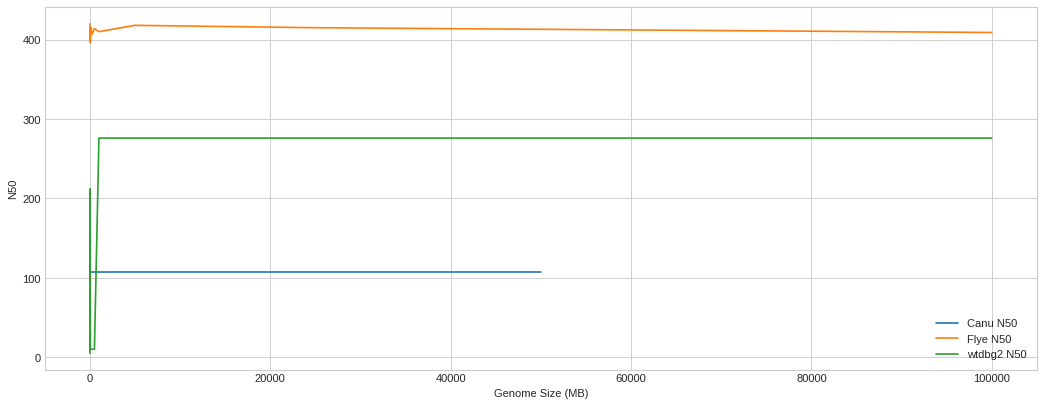

In [94]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

canu = pd.read_csv("/home/minion/Desktop/canu_N50.tsv", sep = "\t")
flye = pd.read_csv("/home/minion/Desktop/flye_N50.tsv", sep = "\t")
wtdbg2 = pd.read_csv("/home/minion/Desktop/wtdbg2_N50.tsv", sep = "\t")

fig=plt.figure(figsize=(16, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(canu.genome_size_mb, canu.scaf_N50, label='Canu N50')
plt.plot(flye.genome_size_mb, flye.scaf_N50, label='Flye N50')
plt.plot(wtdbg2.genome_size_mb, wtdbg2.ctg_N50, label='wtdbg2 N50')
#plt.plot(canu.genome_size_mb, canu.scaf_L50, color='#00FFFF', label='Canu L50')
#plt.plot(flye.genome_size_mb, flye.scaf_L50, color='#00FF00', label='Flye L50')
#plt.plot(wtdbg2.genome_size_mb, wtdbg2.ctg_L50, color='#FF00FF', label='wtdbg2 L50')

plt.xlabel('Genome Size (MB)')
plt.ylabel('N50')

plt.legend()

plt.savefig('/home/minion/Desktop/N50_graph.png')
plt.show()

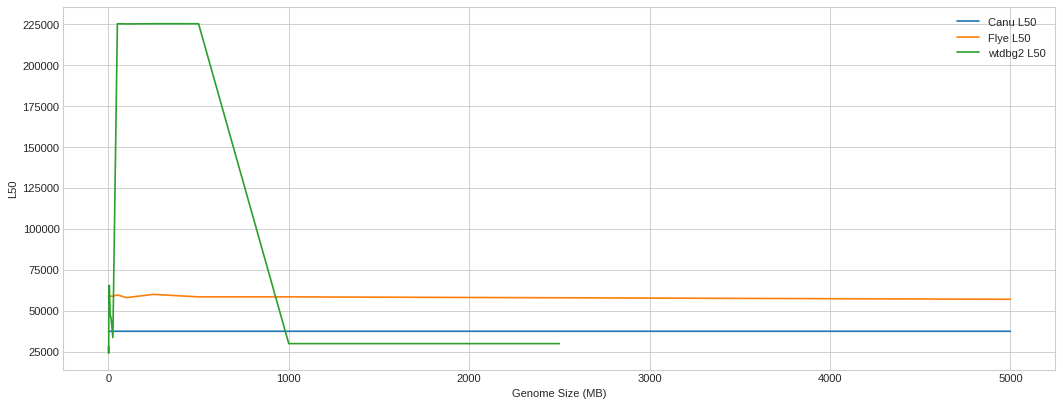

In [157]:
x = canu.iloc[:17]
y = flye.iloc[:17]
z = wtdbg2.iloc[:18]

fig=plt.figure(figsize=(16, 6), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(x.genome_size_mb, x.ctg_L50, label = "Canu L50")
plt.plot(y.genome_size_mb, y.ctg_L50, label = "Flye L50")
plt.plot(z.genome_size_mb, z.ctg_L50, label = "wtdbg2 L50")
plt.xlabel('Genome Size (MB)')
plt.ylabel('L50')

plt.legend()

plt.savefig('/home/minion/Desktop/L50_graph.png')

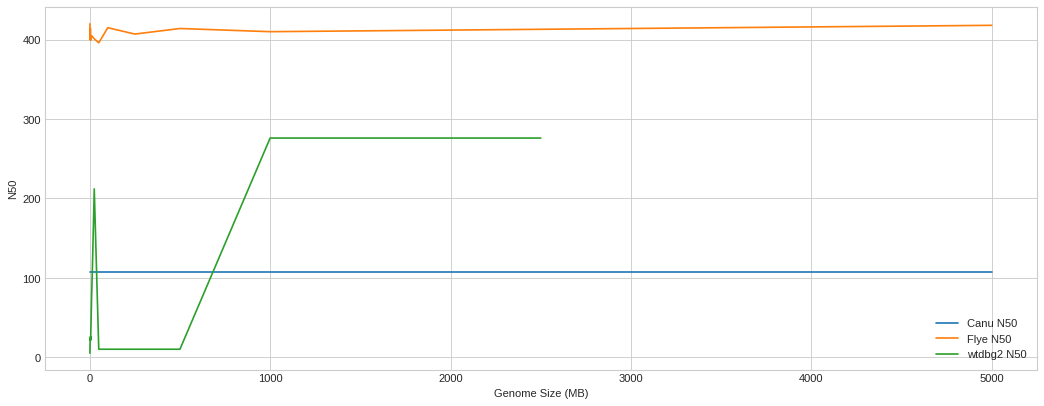

In [154]:
x = canu.iloc[:17]
y = flye.iloc[:17]
z = wtdbg2.iloc[:18]

fig=plt.figure(figsize=(16, 6), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(x.genome_size_mb, x.ctg_N50, label = "Canu N50")
plt.plot(y.genome_size_mb, y.ctg_N50, label = "Flye N50")
plt.plot(z.genome_size_mb, z.ctg_N50, label = "wtdbg2 N50")
plt.xlabel('Genome Size (MB)')
plt.ylabel('N50')

plt.legend()

plt.savefig('/home/minion/Desktop/N50_graph.png')

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

canu = pd.read_csv("/home/minion/Desktop/canu_N50.tsv", sep = "\t")
canu

,n_scaffolds,n_contigs,scaf_bp,contig_bp,gap_pct,scaf_N50,scaf_L50,ctg_N50,ctg_L50,scaf_N90,scaf_L90,ctg_N90,ctg_L90,scaf_max,ctg_max,scaf_n_gt50K,scaf_pct_gt50K,gc_avg,gc_std,filename
0,657,657,14176347,14176347,0.0,107,37357,107,37357,417,9221,417,9221,292020,292020,54,34.130,0.32499,0.05168,/gpfs/ts0/projects/Research_Project-172179/met...
1,657,657,14176332,14176332,0.0,107,37357,107,37357,417,9221,417,9221,292020,292020,54,34.131,0.32499,0.05167,/gpfs/ts0/projects/Research_Project-172179/met...
2,657,657,14176330,14176330,0.0,107,37357,107,37357,417,9221,417,9221,292017,292017,54,34.131,0.32499,0.05168,/gpfs/ts0/projects/Research_Project-172179/met...
3,657,657,14176352,14176352,0.0,107,37358,107,37358,417,9221,417,9221,292019,292019,54,34.131,0.32499,0.05167,/gpfs/ts0/projects/Research_Project-172179/met...
4,657,657,14176353,14176353,0.0,107,37359,107,37359,417,9221,417,9221,292050,292050,54,34.131,0.32499,0.05167,/gpfs/ts0/projects/Research_Project-172179/met...
5,657,657,14176382,14176382,0.0,107,37358,107,37358,417,9221,417,9221,292022,292022,54,34.131,0.32499,0.05168,/gpfs/ts0/projects/Research_Project-172179/met...
6,657,657,14176322,14176322,0.0,107,37358,107,37358,417,9221,417,9221,292023,292023,54,34.131,0.32499,0.05167,/gpfs/ts0/projects/Research_Project-172179/met...
7,657,657,14176370,14176370,0.0,107,37357,107,37357,417,9221,417,9221,292018,292018,54,34.130,0.32499,0.05168,/gpfs/ts0/projects/Research_Project-172179/met...
8,657,657,14176320,14176320,0.0,107,37357,107,37357,417,9221,417,9221,292022,292022,54,34.131,0.32499,0.05168,/gpfs/ts0/projects/Research_Project-172179/met...
9,657,657,14176339,14176339,0.0,107,37357,107,37357,417,9221,417,9221,292018,292018,54,34.130,0.32499,0.05168,/gpfs/ts0/projects/Research_Project-172179/met...


In [ ]:
from Bio import SeqIO
import glob
import os

file_list = glob.glob('BATS_80m_11_cellular.guppy.flipflop.q7.pass.porechop.fq')
for f in file_list:
       base_name = os.path.basename(f)
       new_filename = '%s.filtered.10k.fa' % base_name
       records_to_keep = [x for x in SeqIO.parse(f, 'fastq') if len(x.seq)>=10000]
       SeqIO.write(records_to_keep, new_filename, 'fastq')

with awk
#unzipped
awk 'NR%4==1{a=$0} NR%4==2{b=$0} NR%4==3{c=$0} NR%4==0&&length(b)>10000{print a"\n"b"\n"c"\n"$0;}' file.fq > result.fq
#zipped
gunzip -c file.fqz | awk 'NR%4==1{a=$0} NR%4==2{b=$0} NR%4==3{c=$0} NR%4==0&&length(b)>10000{print a"\n"b"\n"c"\n"$0;}' - | gzip -c - > result.fqz

In [ ]:
#start from assembled contigs (if short reads)
bowtie2-build bb_contigs_short_spades.fasta bb_contigs_short_spades;
bowtie2 -x bb_contigs_short_spades \
-1 2654_3__AE1712_C6_N1_7_80m.fwd.fq.gz \
-2 2654_3__AE1712_C6_N1_7_80m.rev.fq.gz \
--threads 8 \
--no-unal \
-S bb_contigs_short_spades.sam;
samtools view -F 4 -bS bb_contigs_short_spades.sam > bb_contigs_short_spades.raw.bam;
samtools sort bb_contigs_short_spades.raw.bam -o bb_contigs_short_spades.sorted.bam;
samtools index bb_contigs_short_spades.sorted.bam

#if long reads
minimap2 -x map-ont -t <threads> <target> <reads.fq.gz> | gzip -c > mapping.paf.gz 

racon -m 8 -x -6 -g -8 -w 500 \
../BATS_80m_3.q7.pass.porechop.fq.gz \
racon.paf.gz \
racon.contigs.fasta \
-t 8 > racon-2.contigs.fasta

#each time you run racon you need to remap the new contigs created against the raw reads
minimap2 -x map-ont -t 8 \ #-x asm5 for short read mapping
racon-2.contigs.fasta \
../BATS_80m_3.q7.pass.porechop.fq.gz | gzip -c > racon-2.paf.gz

#medaka recomends running racon 4 times for polishing first
#run on local machine
medaka_consensus \
-i BATS_80m_3.q7.pass.porechop.fq.gz \
-d racon-4.contigs.fasta \
-o medaka_racon_wtdbg2_shortreads \
-t 8 -b 50 2>&1 | tee medaka.log #-b --batchsize 50 reduced memory

In [ ]:
checkM
conda install -c <?> checkm
conda install -c bioconda pysam # fix checkM install libhts.so.1

#checkm if not sure lineage/many different lineages
checkm lineage_wf ./bins ./output -x fasta

#if want to set checkm lineage 
checkm taxonomy_wf family Pelagibacteraceae bin/ checkm_output --force_overwrite -x fasta -t 1 

#or save to file
checkm taxonomy_wf family Pelagibacteraceae bin/ checkm_output --force_overwrite -x fasta -t 1 --tab_table --file completeness.txt

In [ ]:
source activate py37
CAT contigs \
-c BATS_11_scaffold.fasta \
-d 2018-10-16_CAT_database \
-t 2018-10-16_taxonomy \
-n 16 \
--out_prefix BATS_11_scaffold_CAT

CAT add_names \
-i BATS_11_scaffold_CAT.contig2classification.txt \
-o BATS_11_scaffold_CAT.contig2classification.official_names.txt \
-t 2018-10-16_taxonomy \
--only_official 

CAT summarise \
-c BATS_11_scaffold.fasta \
-i BATS_11_scaffold_CAT.official_names.txt \
-o BATS_11_scaffold_CAT.summary.txt

In [30]:
import pandas as pd
df = pd.read_csv("/home/minion/projects/BATS_80m_11/CAT/BATS_11_scaffold_CAT.contig2classification.official_names.txt", sep = "\t")
df = df.drop(["classification", "number of ORFs on contig", "number of ORFs classification is based on", "lineage", "lineage scores", "superkingdom", "phylum", "class", "order", "family", "genus"], axis = 1)
df = df[df.species != 'not classified']
df

,contig,species
0,NODE_100000_length_406_cov_3.125356,Pelagibacteraceae bacterium TMED258: 1.00
2,NODE_100002_length_406_cov_3.111111,NaN
7,NODE_100007_length_406_cov_3.088319,NaN
8,NODE_100008_length_406_cov_3.088319,Symbiodinium microadriaticum: 1.00
9,NODE_100009_length_406_cov_3.068376,Rhodobacteraceae bacterium: 1.00
10,NODE_10000_length_1299_cov_1.642283,Cryomorphaceae bacterium: 1.00
11,NODE_100010_length_406_cov_3.065527,Bacteroidetes bacterium SCGC AAA795-G10: 1.00
12,NODE_100011_length_406_cov_3.062678,Rhodobacterales bacterium: 0.53
15,NODE_100014_length_406_cov_3.045584,NaN
17,NODE_100016_length_406_cov_2.997151,NaN


In [ ]:
for i in $(cat filelist.txt); do \
echo $i; \
bwa mem -M -t 8 HTCC1062.fasta ../$i/*_1_* ../$i/*_2_* | \
samtools view - -F 4 -bu | \
samtools sort - -o $i.aln.srt.bam; \
samtools index $i.aln.srt.bam; \
done 

In [ ]:
#mmgenome2 stuff
i=2654_8_AE1712_C11_N8_14_200m
clumpify.sh in1=$i.fwd.fq.gz in2=$i.rev.fq.gz out1=$i.fwd.clumped.fq.gz out2=$i.rev.clumped.fq.gz dedupe optical 2>&1 | tee $i.log
filterbytile.sh in1=$i.fwd.clumped.fq.gz in2=$i.rev.clumped.fq.gz out1=$i.fwd.filtered_by_tile.fq.gz out2=$i.rev.filtered_by_tile.fq.gz 2>&1 | tee -a $i.log
bbduk.sh in1=$i.fwd.filtered_by_tile.fq.gz in2=$i.rev.filtered_by_tile.fq.gz out1=$i.fwd.trimmed.fq.gz out2=$i.rev.trimmed.fq.gz ktrim=r k=23 mink=11 hdist=1 tbo tpe minlen=70 ref=adapters ftm=5 ordered 2>&1 | tee -a $i.log
bbduk.sh in1=$i.fwd.trimmed.fq.gz in2=$i.rev.trimmed.fq.gz out1=$i.fwd.filtered.fq.gz out2=$i.rev.filtered.fq.gz k=31 ref=artifacts,phix ordered cardinality 2>&1 | tee -a $i.log
bbmerge.sh in1=$i.fwd.filtered.fq.gz in2=$i.rev.filtered.fq.gz out1=$i.fwd.ecco.fq.gz out2=$i.rev.ecco.fq.gz ecco mix vstrict ordered 2>&1 | tee -a $i.log
clumpify.sh in1=$i.fwd.ecco.fq.gz in2=$i.rev.ecco.fq.gz out1=$i.fwd.eccc.fq.gz out2=$i.rev.eccc.fq.gz ecc passes=4 reorder 2>&1 | tee -a $i.log
tadpole.sh in1=$i.fwd.eccc.fq.gz in2=$i.rev.eccc.fq.gz out1=$i.fwd.ecct.fq.gz out2=$i.rev.ecct.fq.gz ecc k=62 ordered 2>&1 prefilter=2 | tee -a $i.log
bbmerge-auto.sh in1=$i.fwd.ecct.fq.gz in2=$i.rev.ecct.fq.gz out=$i.merged.fq.gz outu=$i.unmerged.fq.gz strict k=93 extend2=80 rem ordered prefilter=2 2>&1 | tee -a $i.log
bbduk.sh in=$i.unmerged.fq.gz out=$i.qtrimmed.fq.gz qtrim=r trimq=10 minlen=70 ordered 2>&1 | tee -a $i.log

#--- Assembly ---#
spades.py --meta -k 25,55,95,125 --phred-offset 33 -s $i.merged.fq.gz --12 $i.qtrimmed.fq.gz -o ${i}_spades_out_not_normalised -m 128 -t 16 --only-assembler
rm $i.fwd.clumped.fq.gz $i.rev.clumped.fq.gz $i.fwd.trimmed.fq.gz $i.rev.trimmed.fq.gz $i.fwd.filtered.fq.gz $i.rev.filtered.fq.gz $i.fwd.ecco.fq.gz $i.rev.ecco.fq.gz $i.fwd.eccc.fq.gz $i.rev.eccc.fq.gz $i.fwd.ecct.fq.gz $i.rev.ecct.fq.gz $i_unmerged.fq.gz $i.fwd.filtered_by_tile.fq.gz $i.rev.filtered_by_tile.fq.gz

bwa mem -t 16 2654_12_AE1712_C16_N8_14_200m.fasta ../2654_2_AE1712_C3_N8_14_200m.qtrimmed.fq.gz | samtools view - -F4 -bS -@ 16 | samtools sort - -@ 16 -o BATS_12.vs.BATS_2.aln.srt.fasta
samtools index BATS_12.vs.BATS_2.aln.srt.fasta -@ 16 
samtools idxstats BATS_12.vs.BATS_2.aln.srt.fasta | cut -f1,3 > BATS_12_vs_BATS_2_depth_cov



In [95]:
import pandas as pd
df = pd.read_csv("/home/minion/Downloads/BATS_12_tSNE.csv", index_col=0)
df1 = df[['tSNE1', 'tSNE2']]
df1

,tSNE1,tSNE2
1,-2.999722,7.402147
2,-3.729445,-3.281492
3,4.128070,4.728922
4,-1.788465,-1.844795
5,-3.038960,6.613765
6,-2.989086,7.292993
7,-2.983983,7.720516
8,4.049224,5.730662
9,-1.122588,-1.882215
10,-2.371472,-8.028710


In [96]:
import hdbscan
clusterer = hdbscan.HDBSCAN()
clusterer.fit(df1)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
    prediction_data=False)

In [97]:
clusterer.labels_.max()

9808

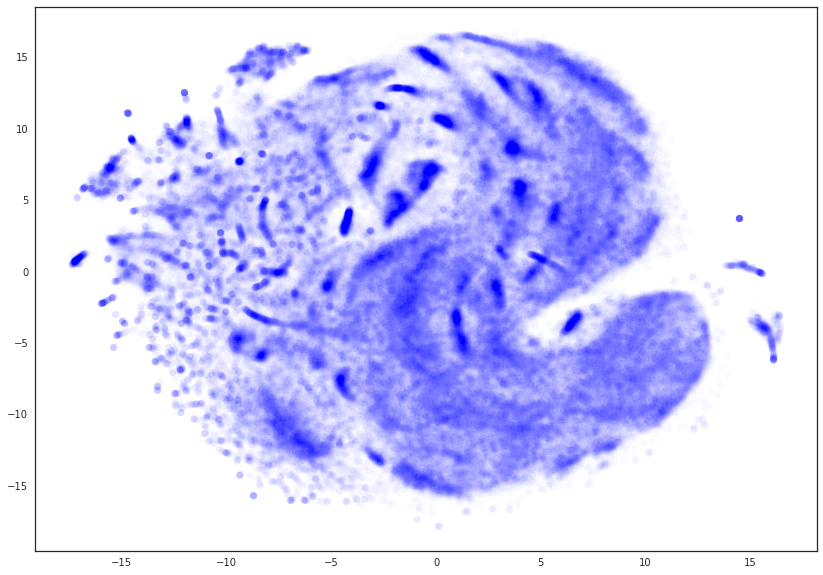

In [101]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(x = df1.tSNE1, y = df1.tSNE2, s=50, linewidth=0, c='b', alpha=0.007)

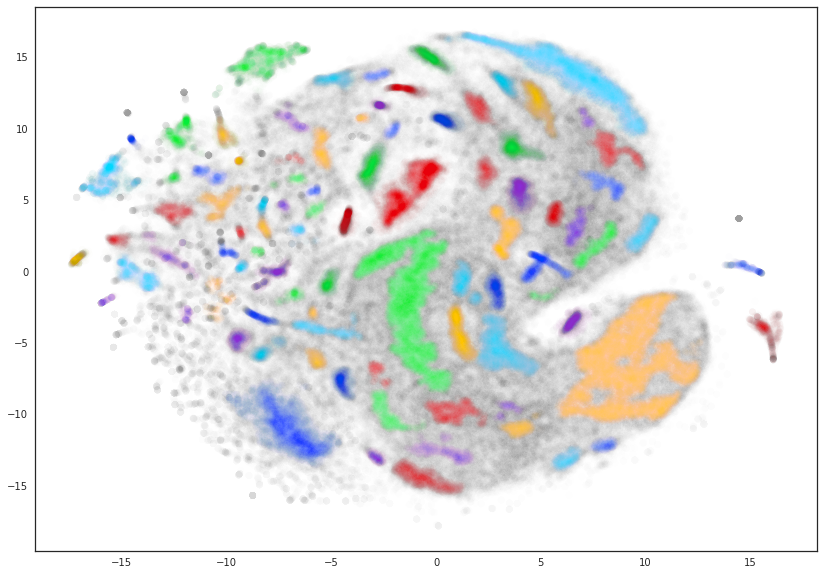

In [179]:
import seaborn as sns
clusterer = hdbscan.HDBSCAN(min_cluster_size=150, min_samples=211, alpha=1.0).fit(df1)
color_palette = sns.color_palette('bright', (clusterer.labels_.max()+1))
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(x = df1.tSNE1, y = df1.tSNE2, s=50, linewidth=0, c=cluster_member_colors, alpha=0.007)
plt.savefig("clusters.png")

In [207]:
df2 = pd.DataFrame(clusterer.labels_)
df = df.reset_index(drop=True)

In [208]:
df3 = pd.concat([df, df2], axis = 1)
df3

,scaffold,length,gc,tSNE1,tSNE2,0
0,NODE_1_length_208848_cov_13.756155,208848,51.12,-2.999722,7.402147,13
1,NODE_2_length_167228_cov_15.219314,167228,39.54,-3.729445,-3.281492,-1
2,NODE_3_length_157403_cov_17.620093,157403,48.66,4.128070,4.728922,69
3,NODE_4_length_156587_cov_9.775096,156587,41.27,-1.788465,-1.844795,85
4,NODE_5_length_153100_cov_13.334211,153100,48.75,-3.038960,6.613765,13
5,NODE_6_length_137037_cov_13.195045,137037,50.81,-2.989086,7.292993,13
6,NODE_7_length_135057_cov_12.879925,135057,51.94,-2.983983,7.720516,13
7,NODE_8_length_134636_cov_15.358803,134636,50.17,4.049224,5.730662,69
8,NODE_9_length_130377_cov_20.121595,130377,41.90,-1.122588,-1.882215,85
9,NODE_10_length_129529_cov_7.041382,129529,37.59,-2.371472,-8.028710,68


In [210]:
df3.to_csv("/home/minion/Desktop/bin_catagories.tsv", sep = "\t", index = False)
for i in $(cut -f6 ../bin_catagories.tsv | sort -u); do mkdir $i; done
for i in $(cut -f6 ../bin_catagories.tsv | sort -u); do awk -F"\t" '{if ($6 == '$i') print $0}' ../bin_catagories.tsv > $i/filenames.txt; done
for i in *; do cut -f1 $i/filenames.txt > $i/$i.txt; done
for i in *; do seqtk subseq ../2654_12_AE1712_C16_N8_14_200m.fasta $i/$i.txt > $i/$i.out.fa; done

In [ ]:
for i in $(cut -f5 output.hdbscan.tsv | sort -u); do awk -F"\t" '{if ($5 == '$i') print $0}' output.hdbscan.tsv > bin.$i.txt; done
for i in bin.*; do cut -f1 $i > $(basename $i .txt).names.txt; done
for i in *.names.txt; do seqtk subseq genomes/all_10k.fna $i > $(basename $i .names.txt).fna; done

In [17]:
from Bio import SeqIO
import umap
record = SeqIO.read("/home/minion/Desktop/2654_12_AE1712_C16_N8_14_200m.qtrimmed.fasta", "fasta")
record[0]

ValueError: More than one record found in handle

,>7001289F:142:HCVFHBCX2:2:2101:14653:54112 1:N:0:AAGAGGCA+TCTCTCCG
0,AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA...
1,>7001289F:142:HCVFHBCX2:2:2101:14653:54112 2:N...
2,TGTATGTGTTATTTGATTTTTTTGTTATTTTTTTTAGTGATTTTCC...
3,>7001289F:142:HCVFHBCX2:2:2203:9629:48112 1:N:...
4,CTCTCTCTCTCTCTCTCTCTCTCTCCCTCTTCCCCCCCCCCCTTCA...
5,>7001289F:142:HCVFHBCX2:2:2203:9629:48112 2:N:...
6,ATTTCGGGCTATTTCGCTCCCTTCAAAGCAATCCAAAGAAAAGGTA...
7,>7001289F:142:HCVFHBCX2:1:1101:3926:66237 1:N:...
8,GCCTTCTAGGACCTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...
9,>7001289F:142:HCVFHBCX2:1:1101:3926:66237 2:N:...


In [7]:
map ['A', 'G', 'C', 'T'] -> [ 1, 2, 3, 4]

SyntaxError: invalid syntax (<ipython-input-7-a7b6a9e6ea99>, line 1)

In [ ]:
bbsplit.sh ref=x.fa,y.fa in=reads.fq basename=o%.fq
bbsplit.sh ref=../bins/ in=../2654_12_AE1712_C16_N8_14_200m.qtrimmed.fq.gz basename=o%.fq

In [ ]:
checkm lineage_wf ./bins ./checkm_output -x fa --tab_table --file checkm_output.txt -t 16 --pplacer_threads 16 --force_overwrite 2>&1 | tee checkm.log

In [ ]:
refinem scaffold_stats -c 8 2654_12_AE1712_C16_N8_14_200m.fasta bins/ stats_output_dir *.bam -x fa

In [ ]:
'''
is kmer counting a good way to bin genomes
take 10 random genomes
split into 10k fragments
kmer count
'''
for i in *; do seqkit sliding -W 10000 -s 10000 $i > $(basename $i .fna)_10k_split.fna; done
python ~/tools/marine-phage-paper-scripts/kmer_freq.py test.fasta -k 5 -t 8 > test_kmer_freq.txt
python ~/tools/marine-phage-paper-scripts/run_umap.py test_kmer_freq.txt -p test -l 1 -n 2

In [ ]:
bbwrap.sh ref=AE1712_1_80m_1k_reformatted.fasta build=1 append \
in=AE1712_1_interleaved_80m.qtrimmed.fq.gz,AE1712_1_interleaved_80m.merged.fq.gz,\
AE1712_5_interleaved_80m.qtrimmed.fq.gz,AE1712_5_interleaved_80m.merged.fq.gz,\
AE1712_3_interleaved_80m.qtrimmed.fq.gz,AE1712_3_interleaved_80m.merged.fq.gz,\
AE1712_7_interleaved_80m.qtrimmed.fq.gz,AE1712_7_interleaved_80m.merged.fq.gz,\
AE1712_9_interleaved_80m.qtrimmed.fq.gz,AE1712_9_interleaved_80m.merged.fq.gz,\
AE1712_11_interleaved_80m.qtrimmed.fq.gz,AE1712_11_interleaved_80m.merged.fq.gz \
out=AE1712_1_80m_1k_reformatted.sam

In [ ]:
BinSanity
get-ids -f . -l gene_calls.fa -o ids.txt -x 1
Binsanity-profile -i gene_calls.fa -s . --ids ids.txt -c gene_calls_coverage
Binsanity-wf -f . -l gene_calls.fa -c gene_calls_coverage.cov.x100.lognorm -o BinSanityWF_output
rename "Bin-1-" "Bin-01-" *
rename "Bin-0-" "Bin-00-" *
for i in $(ls *.fna | sed "s/AE1712_3_80m_1k_reformatted_//g; s/-refined_.*//g" | uniq); do echo $i; grep -h ">" *$i*.fna > $i.bin; done
awk '{print $0,FILENAME}' *.bin OFS='\t' | sed "s/>//g; s/.bin//g; s/-/_/g" > binsanity_bins.tsv

In [ ]:
MetaBAT2
runMetaBat.sh AE1712_3_80m_1k_reformatted.fasta AE1712_3_80m_1k_reformatted.srt.bam
cd AE1712_3_80m_1k_reformatted.fasta.metabat-bins
grep ">" * | sed "s/.fa:>/\t/g; s/bin./bin_/g" | awk '{print $2,$1}' OFS='\t' > ../metabat_bins.tsv

In [ ]:
Maxbin
pileup.sh in=AE1712_3_80m_1k_reformatted.srt.bam out=AE1712_3_80m_1k_reformatted.pileup
cut -f1,2 > cov_for_maxbin.tsv
mkdir maxbin_output
run_MaxBin.pl -contig AE1712_3_80m_1k_reformatted.fasta -out maxbin_output/ -abund cov_for_maxbin.tsv -thread 16
grep ">" * | sed "s/.fa:>/\t/g; s/bin./bin_/g" | awk '{print $2,$1}' OFS='\t' > ../metabat_bins.tsv

In [ ]:
CAT Taxonomy
cut -f1,7-99 gene_calls_CAT.official_names.txt | sed "s/: ....//g" > CAT_taxonomy.tsv

In [5]:
import pandas as pd
df = pd.read_csv("/home/minion/projects/anvio3/CAT_taxonomy.tsv", sep = "\t")
df.fillna("not classified", inplace=True)
df.to_csv("/home/minion/projects/anvio3/CAT_taxonomy_fixed.tsv", sep = "\t")

In [ ]:
kaiju -z 32 -t ~/../bt273/BIOS-SCOPE/metag/ashley/tools/kaiju/kaijudb/nodes.dmp -f ~/../bt273/BIOS-SCOPE/metag/ashley/tools/kaiju/kaijudb/nr/kaiju_db_nr.fmi -i gene_calls.fa -o kaiju.out -v
kaiju-addTaxonNames -t ~/../bt273/BIOS-SCOPE/metag/ashley/tools/kaiju/kaijudb/nodes.dmp -n ~/../bt273/BIOS-SCOPE/metag/ashley/tools/kaiju/kaijudb/names.dmp -i kaiju.out -o kaiju.names.out -r superkingdom,phylum,order,class,family,genus,species

In [ ]:
#when installing CAT wget yourself
wget ftp://ftp.ncbi.nih.gov/blast/db/FASTA/nr.gz.md5
wget ftp://ftp.ncbi.nih.gov/blast/db/FASTA/nr.gz
md5sum -c nr.gz.md5
wget ftp://ftp.ncbi.nlm.nih.gov/pub/taxonomy/taxdump.tar.gz
wget ftp://ftp.ncbi.nih.gov/pub/taxonomy/accession2taxid/prot.accession2taxid.gz

#mkdir dirs
CAT prepare --existing -d 2019-06-15_CAT_database -t 2019-06-15_taxonomy

CAT contigs \
-c gene_calls.fa \
-d ~/../bt273/BIOS-SCOPE/metag/ashley/tools/CAT/2019-06-15_CAT_database \
-t ~/../bt273/BIOS-SCOPE/metag/ashley/tools/CAT/2019-06-15_taxonomy \
-n 16 \
--out_prefix CAT_output/gene_calls_CAT \
--force

CAT add_names \
-i CAT_output/gene_calls_CAT.contig2classification.txt \
-o CAT_output/gene_calls_CAT.official_names.txt \
-t ~/../bt273/BIOS-SCOPE/metag/ashley/tools/CAT/2019-06-15_taxonomy \
--only_official 

CAT summarise \
-c gene_calls.fa \
-i CAT_output/gene_calls_CAT.official_names.txt \
-o CAT_output/gene_calls_CAT.summary.txt

In [ ]:
conda activate marine_scripts
python ~/tools/marine-phage-paper-scripts/kmer_freq.py AE1712_3_80m_1k_reformatted.fasta -k 5 -t 8 > bats3_kmer_count.txt
python ~/tools/marine-phage-paper-scripts/run_umap.py bats3_kmer_count.txt -p bats3 -l 1000
python ~/tools/marine-phage-paper-scripts/run_hdbscan.py bats3.umap.tsv -p bats3 -c 30
python ~/tools/marine-phage-paper-scripts/plot_kmer_bins.py bats3.hdbscan.tsv -p bats3
cut -f1,5 bats3.hdbscan.tsv > kmer_bins.tsv
sed "s/\t/\tbin_/g" kmer_bins.tsv > kmer_bins2.tsv
mv kmer_bins2.tsv kmer_bins.tsv